# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from typing import List, Tuple, Union
from scipy.stats import boxcox
from scipy.stats import probplot

pd.set_option('display.max_columns', None)

In [2]:
dataset_path = './fintech_data_29_52_1008.csv'

In [3]:
fintech_df = pd.read_csv(dataset_path)

# EDA

In [4]:
fintech_df.shape

(27030, 24)

what is does the rows look like?

In [5]:
fintech_df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceG...,president/owner,10+ years,MORTGAGE,80000.0,NaN,Source Verified,333xx,FL,8275.0,239986.0,39474,Current,6000.0,FL,6000.0,36 months,0.0649,4,14 August 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation
1,Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceD...,PETTY OFFICER FIRST CLASS,10+ years,MORTGAGE,75384.0,NaN,Source Verified,237xx,VA,25385.0,279232.0,158200,Current,15000.0,VA,15000.0,60 months,0.1806,20,17 July 2017,False,Individual,debt_consolidation,Debt consolidation
2,YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT...,nyco,4 years,OWN,33800.0,NaN,Verified,111xx,NY,282.0,1691.0,113752,Fully Paid,11500.0,NY,11500.0,36 months,0.1114,7,12 December 2012,False,INDIVIDUAL,other,Family Help
3,YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZT...,Nippon Express USA Inc.,10+ years,OWN,50000.0,NaN,Verified,070xx,NJ,14458.0,130124.0,181412,Fully Paid,18000.0,NJ,18000.0,60 months,0.2149,23,12 November 2012,False,INDIVIDUAL,credit_card,Credit Card Payoff
4,YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YW...,Operations Manager,2 years,MORTGAGE,75000.0,160000.0,Not Verified,750xx,TX,27703.0,443252.0,227090,Current,25000.0,TX,25000.0,60 months,0.1171,10,19 September 2019,False,Joint App,home_improvement,Home improvement


info regarding the dataset

In [6]:
fintech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24702 non-null  object 
 2   Emp Length           25198 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1860 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

how many columns have missing values and by how many?

In [7]:
fintech_df.isnull().mean().sort_values(ascending=False)*100

Annual Inc Joint       93.118757
Emp Title               8.612653
Emp Length              6.777654
Int Rate                4.384018
Description             0.813910
State                   0.000000
Purpose                 0.000000
Type                    0.000000
Pymnt Plan              0.000000
Issue Date              0.000000
Grade                   0.000000
Term                    0.000000
Funded Amount           0.000000
Customer Id             0.000000
Loan Amount             0.000000
Loan Id                 0.000000
Tot Cur Bal             0.000000
Avg Cur Bal             0.000000
Addr State              0.000000
Zip Code                0.000000
Verification Status     0.000000
Annual Inc              0.000000
Home Ownership          0.000000
Loan Status             0.000000
dtype: float64

In [8]:
fintech_df.isnull().sum().sort_values(ascending=False)*100

Annual Inc Joint       2517000
Emp Title               232800
Emp Length              183200
Int Rate                118500
Description              22000
State                        0
Purpose                      0
Type                         0
Pymnt Plan                   0
Issue Date                   0
Grade                        0
Term                         0
Funded Amount                0
Customer Id                  0
Loan Amount                  0
Loan Id                      0
Tot Cur Bal                  0
Avg Cur Bal                  0
Addr State                   0
Zip Code                     0
Verification Status          0
Annual Inc                   0
Home Ownership               0
Loan Status                  0
dtype: int64

As you can see 5 columns have missing values which are: Emp Title, Emp Length, Annual Inc Joint, Int Rate, Description

In [9]:
fintech_df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1860.000000,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25845.000000,27030.000000
mean,7.925754e+04,129055.124782,13746.438846,1.445167e+05,135571.697188,15442.939327,15442.939327,0.130702,10.904698
std,7.909597e+04,65960.411187,16785.513307,1.582944e+05,77822.021405,9424.206653,9424.206653,0.048983,6.344409
min,2.230000e+02,22020.000000,0.000000,1.000000e+00,1.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.800000e+04,86000.000000,3128.000000,2.954725e+04,68354.000000,8000.000000,8000.000000,0.091700,6.000000
50%,6.700000e+04,115000.000000,7455.500000,8.160850e+04,136046.000000,13500.000000,13500.000000,0.126100,10.000000
75%,9.500000e+04,154550.000000,19056.750000,2.168390e+05,202992.500000,20400.000000,20400.000000,0.159900,15.000000
max,9.550000e+06,686000.000000,337533.000000,2.752103e+06,270283.000000,40000.000000,40000.000000,0.309900,35.000000


In [10]:
def draw_corr_matrix(df: pd.DataFrame, figsize: tuple = (8, 6)) -> None:
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

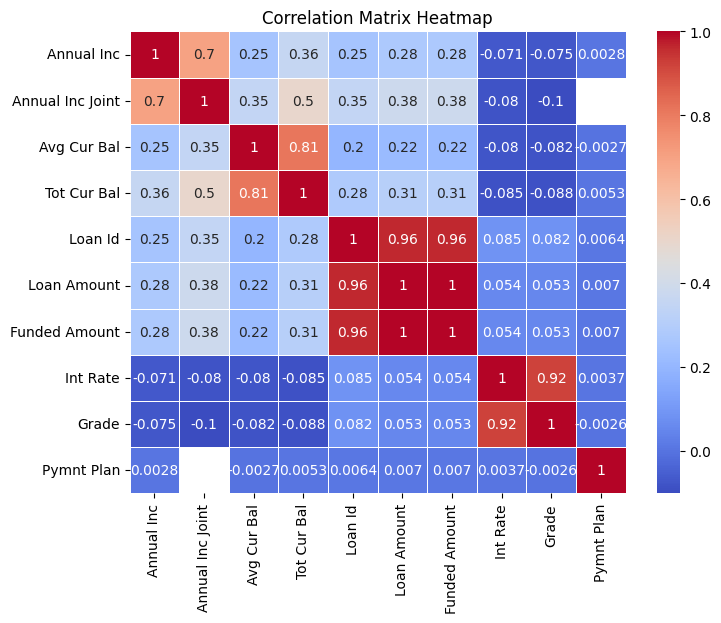

In [11]:
draw_corr_matrix(fintech_df)

Some Insights:
 1. there are no 2 variables negatively correlated
 2. There are some strong positive correlations between 2 variables exceeding 0.9 like (Funded Amount, Loan Id, 0.96) , (Funded Amount, Loan Amount, 1), (Loan Amount, Loan Id, 0.96), (Grade, Int Rate, 0.92)
 3. Some weaker positive correlations that should be mentioned are (Total Cur Bal, Avg Cur Bal, 0.81), (Annual Inc, Annual Inc Joint, 0.7)

### Tidy up column names

In [12]:
fintech_df.columns

Index(['Customer Id', 'Emp Title', 'Emp Length', 'Home Ownership',
       'Annual Inc', 'Annual Inc Joint', 'Verification Status', 'Zip Code',
       'Addr State', 'Avg Cur Bal', 'Tot Cur Bal', 'Loan Id', 'Loan Status',
       'Loan Amount', 'State', 'Funded Amount', 'Term', 'Int Rate', 'Grade',
       'Issue Date', 'Pymnt Plan', 'Type', 'Purpose', 'Description'],
      dtype='object')

In [13]:
fintech_df_2 = fintech_df.copy()

In [14]:
def tidy_up_columns(df: pd.DataFrame):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [15]:
fintech_df_2 = tidy_up_columns(fintech_df_2)

In [16]:
fintech_df_2.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

### Choose Suitable Index

In [17]:
fintech_df_2['customer_id'].nunique() == fintech_df_2.shape[0] 

True

In [18]:
fintech_df_2['customer_id']

0        YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceG...
1        Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceD...
2        YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT...
3        YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZT...
4        YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YW...
                               ...                        
27025    YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YT...
27026    YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XH...
27027    Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceD...
27028    YidsXHgxOVx4OTAjXHhjM0pceGNkKlx4ZDJceDlkXHhlZF...
27029    YickXHgxMVx4MDVceGM3JVx4ZjZGXHhhNllmXHhmNDRceG...
Name: customer_id, Length: 27030, dtype: object

In [19]:
def set_index(col_name: str, df: pd.DataFrame):
    df = df.set_index(col_name)
    return df

In [20]:
fintech_df_2 = set_index('customer_id', fintech_df_2)

In [21]:
fintech_df_2.head()

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,,,,,,,,,,,,,,,,,,,,,,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,president/owner,10+ years,MORTGAGE,80000.0,NaN,Source Verified,333xx,FL,8275.0,239986.0,39474,Current,6000.0,FL,6000.0,36 months,0.0649,4,14 August 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,PETTY OFFICER FIRST CLASS,10+ years,MORTGAGE,75384.0,NaN,Source Verified,237xx,VA,25385.0,279232.0,158200,Current,15000.0,VA,15000.0,60 months,0.1806,20,17 July 2017,False,Individual,debt_consolidation,Debt consolidation
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,nyco,4 years,OWN,33800.0,NaN,Verified,111xx,NY,282.0,1691.0,113752,Fully Paid,11500.0,NY,11500.0,36 months,0.1114,7,12 December 2012,False,INDIVIDUAL,other,Family Help
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,Nippon Express USA Inc.,10+ years,OWN,50000.0,NaN,Verified,070xx,NJ,14458.0,130124.0,181412,Fully Paid,18000.0,NJ,18000.0,60 months,0.2149,23,12 November 2012,False,INDIVIDUAL,credit_card,Credit Card Payoff
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,Operations Manager,2 years,MORTGAGE,75000.0,160000.0,Not Verified,750xx,TX,27703.0,443252.0,227090,Current,25000.0,TX,25000.0,60 months,0.1171,10,19 September 2019,False,Joint App,home_improvement,Home improvement


## Question 1: What is the distribution of loan amounts across different loan statuses?

In [22]:
def draw_boxplot_for_two_columns(col_name_1: str, col_name_2: str, df: pd.DataFrame):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col_name_1, y=col_name_2, data=df)
    plt.title(f'{col_name_1} vs {col_name_2}')
    plt.xlabel(col_name_1, fontsize=12)
    plt.ylabel(col_name_2, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

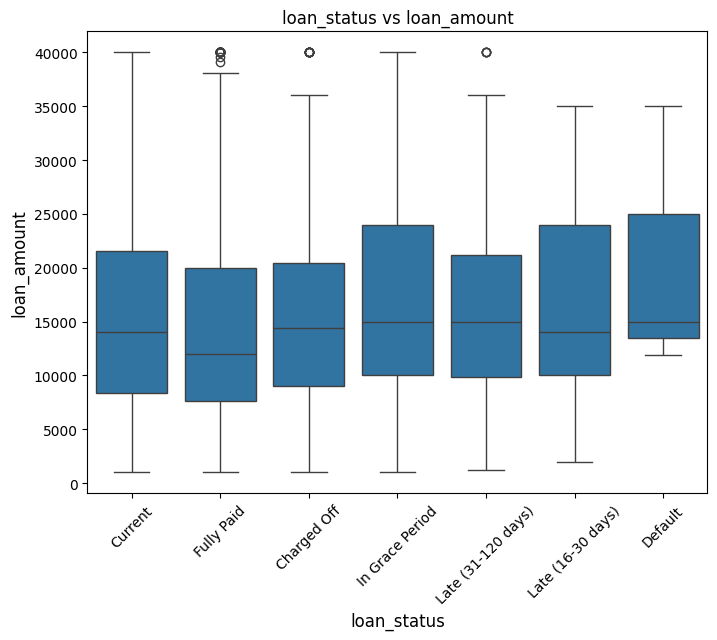

In [23]:
draw_boxplot_for_two_columns('loan_status', 'loan_amount', fintech_df_2)

In [24]:
def get_loan_amount_for_each_status(df: pd.DataFrame):
    loan_amount = df.groupby('loan_status')['loan_amount'].sum().sort_values(ascending=False)
    return loan_amount

In [25]:
get_loan_amount_for_each_status(fintech_df_2)

loan_status
Current               272381825.0
Fully Paid            107814475.0
Charged Off            27742925.0
Late (31-120 days)      5053900.0
In Grace Period         2863825.0
Late (16-30 days)       1503800.0
Default                   61900.0
Name: loan_amount, dtype: float64

#### Insights from Loan Amount Distribution by Loan Status

- **Current loans** have the highest total loan amount, summing to approximately \$272.4 million. This indicates that the majority of loans are still in progress and have not yet reached a conclusion, whether paid off, late, or defaulted.
- **Fully Paid loans** make up the second-largest share, with \$107.8 million in total. This is a positive sign of a significant portion of loans being repaid successfully.
- **Charged Off loans** represent \$27.7 million in total, indicating a notable amount of loans that have been written off due to the borrower's inability to repay.
- **Late loans** (31-120 days late) account for \$5.05 million, while **Late loans** (16-30 days late) total only \$1.5 million. This suggests that most late loans are significantly overdue.
- **In Grace Period loans** make up \$2.86 million. This represents loans that are temporarily delinquent but have a grace period for repayment.
- **Defaulted loans** are the smallest category, totaling just \$61,900. This is a good indication that defaults are rare, but these loans are likely beyond recovery.
  
#### Observations from the Boxplot:
- **Fully Paid loans** have a slightly lower median loan amount than other statuses, indicating that borrowers with smaller loans may be more likely to repay fully.
- There are outliers in categories like **Fully Paid** and **Charged Off**, representing significantly larger loans compared to the majority.


In [26]:
fintech_df_2['grade'].unique()

array([ 4, 20,  7, 23, 10, 19,  8, 14,  5, 11, 18,  6,  1, 12, 15, 25, 13,
        2,  9,  3, 28, 17, 27, 24, 30, 16, 26, 21, 29, 35, 22, 33, 34, 31,
       32], dtype=int64)

## Question 2: What is the distribution of loan amounts across different income levels?

In [27]:
def plot_loan_amount_by_income_level(df: pd.DataFrame, 
                                     income_col: str='annual_inc', 
                                     loan_col: str='loan_amount', 
                                     low_quantile: int=0.33,
                                     high_quantile: int=0.66):
    """
    Categorizes income levels into 'Low', 'Medium', and 'High' based on quantiles, 
    and plots a box plot of loan amounts by income level.
    
    Parameters:
    - data: DataFrame containing the income and loan columns
    - income_col: The column name for income (default is 'annual_inc')
    - loan_col: The column name for loan amount (default is 'loan_amount')
    
    Returns:
    - None: Displays the box plot
    """
    # Define income quantiles for categorizing income levels
    low_income_threshold = df[income_col].quantile(low_quantile)
    high_income_threshold = df[income_col].quantile(high_quantile)

    # Categorize income levels
    def categorize_income(inc):
        if inc <= low_income_threshold:
            return 'Low'
        elif inc <= high_income_threshold:
            return 'Medium'
        else:
            return 'High'

    # Apply categorization to create a new column for income levels
    df['income_level'] = df[income_col].apply(categorize_income)
    df['income_level'] = pd.Categorical(df['income_level'], categories=['Low', 'Medium', 'High'], ordered=True)
    for level in ['Low', 'Medium', 'High']:
        min_income = df[df['income_level'] == level][income_col].min()
        max_income = df[df['income_level'] == level][income_col].max()
        print(f"{level} Income Level: Min = {min_income}, Max = {max_income}")

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.boxplot(x='income_level', y=loan_col, data=df, palette='viridis')

    # Add labels and title
    plt.xlabel('Income Level')
    plt.ylabel('Loan Amount')
    plt.title('Distribution of Loan Amounts by Income Level')

    # Show the plot
    plt.show()


Low Income Level: Min = 223.0, Max = 53000.0
Medium Income Level: Min = 53040.0, Max = 82000.0
High Income Level: Min = 82041.0, Max = 9550000.0


C:\Users\001\AppData\Local\Temp\ipykernel_9248\3286803330.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income_level', y=loan_col, data=df, palette='viridis')


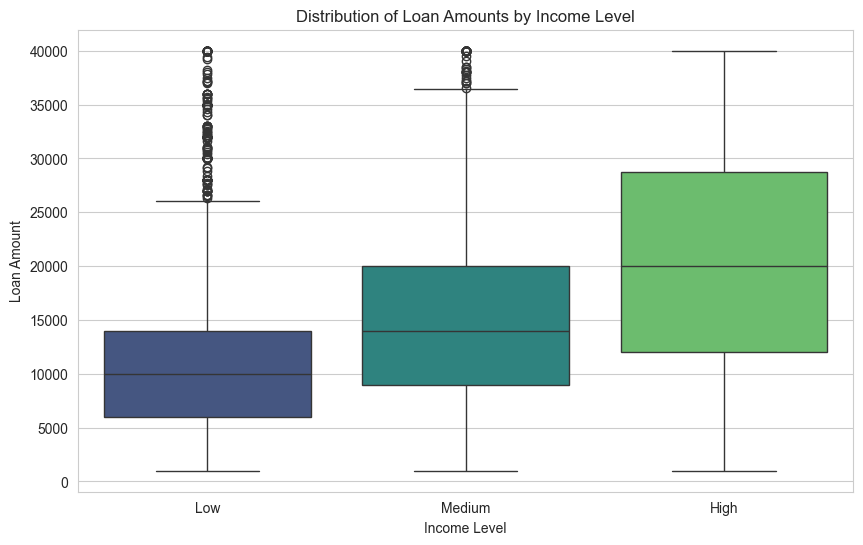

In [28]:
plot_loan_amount_by_income_level(fintech_df_2)

From this box plot, we can observe the following insights:
1. Loan Amount Increases with Income Level: Higher income levels generally correspond to larger loan amounts, as shown by the upward shift in the median loan amount across "Low," "Medium," and "High" income groups.

2. Variability in Loan Amounts: The "High" income group has the largest spread in loan amounts, indicating that borrowers with higher incomes tend to take out loans of varying sizes.

3. Outliers in Low and Medium Income Groups: There are a significant number of high loan amount outliers in the "Low" and "Medium" income groups, suggesting that some borrowers in these categories may be taking on larger loans than typical for their income level. Also, number of outliers decrease as income level increases

## Question 3: What is the average loan amount and interest rate by employment length, and does employment stability (e.g., longer employment) correlate with better loan terms (lower interest rates)?

In [29]:
def analyze_loan_terms_by_emp_length(df: pd.DataFrame, emp_length_col: str='emp_length', loan_col: str='loan_amount', int_rate_col: str='int_rate'):
    """
    Analyzes the average loan amount and interest rate by employment length,
    and visualizes any potential correlation between employment stability and loan terms.
    
    Parameters:
    - df: DataFrame containing the loan and employment data.
    - emp_length_col: The column name for employment length (default is 'emp_length').
    - loan_col: The column name for loan amount (default is 'loan_amount').
    - int_rate_col: The column name for interest rate (default is 'int_rate').
    
    Returns:
    - None: Displays bar plots of average loan amount and interest rate by employment length.
    """
    avg_loan_int_by_emp_length = df.groupby(emp_length_col).agg(
        avg_loan_amount=(loan_col, 'mean'),
        avg_interest_rate=(int_rate_col, 'mean')
    ).reset_index()

    avg_loan_int_by_emp_length = avg_loan_int_by_emp_length.sort_values(by=emp_length_col)

    plt.figure(figsize=(12, 5))
    sns.barplot(data=avg_loan_int_by_emp_length, x=emp_length_col, y='avg_loan_amount', palette="viridis")
    plt.title('Average Loan Amount by Employment Length')
    plt.xlabel('Employment Length')
    plt.ylabel('Average Loan Amount')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.barplot(data=avg_loan_int_by_emp_length, x=emp_length_col, y='avg_interest_rate', palette="magma")
    plt.title('Average Interest Rate by Employment Length')
    plt.xlabel('Employment Length')
    plt.ylabel('Average Interest Rate (%)')
    plt.xticks(rotation=45)
    plt.show()


C:\Users\001\AppData\Local\Temp\ipykernel_9248\592411899.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_loan_int_by_emp_length, x=emp_length_col, y='avg_loan_amount', palette="viridis")


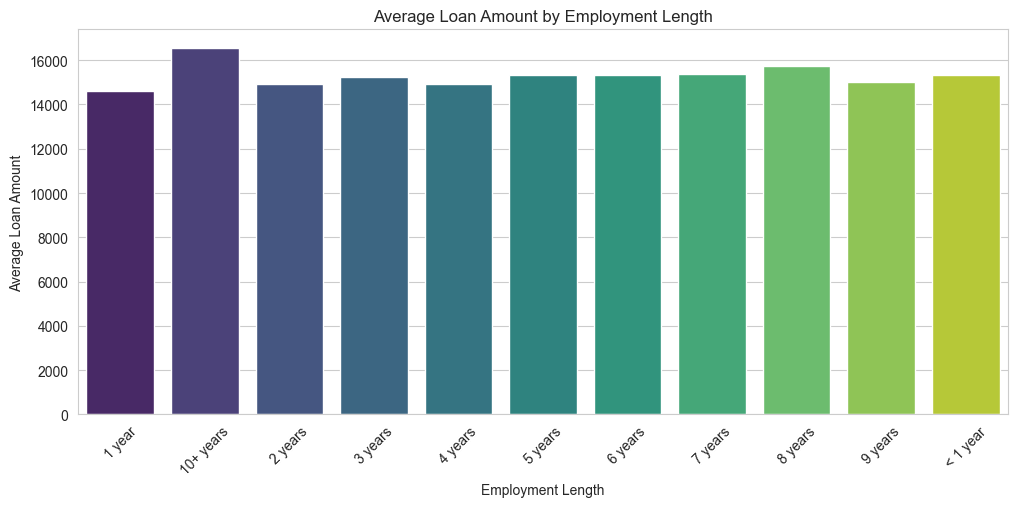

C:\Users\001\AppData\Local\Temp\ipykernel_9248\592411899.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_loan_int_by_emp_length, x=emp_length_col, y='avg_interest_rate', palette="magma")


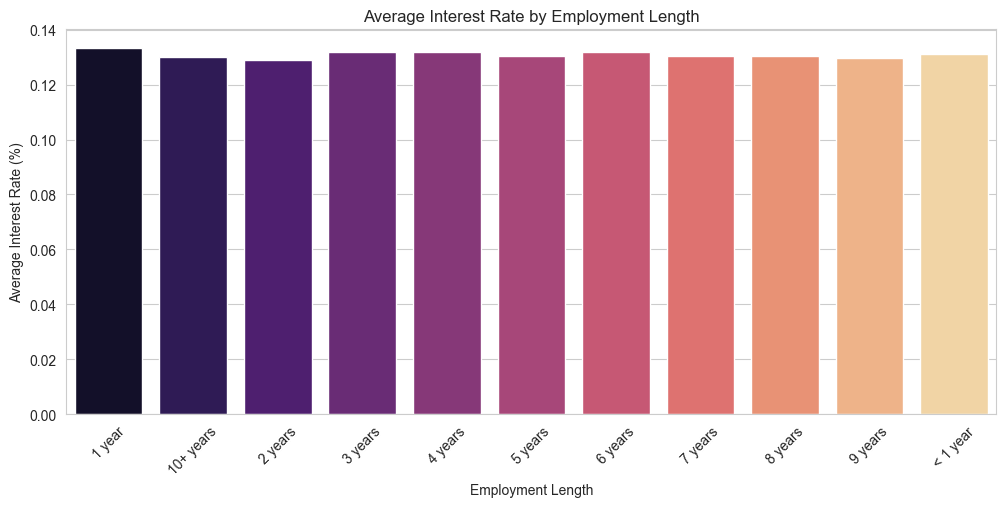

In [30]:
analyze_loan_terms_by_emp_length(fintech_df_2)


Some insights from both plots:

1. The average loan amount appears fairly consistent across different employment lengths, with only slight variations. Notably, those with 10+ years of employment have a slightly higher average loan amount, but the differences across employment lengths are not substantial. This suggests that loan amount may not be strongly influenced by employment stability.
2. Borrowers with `10+ years` of employment tend to receive slightly higher loan amounts, which could indicate a preference among lenders to extend slightly larger loans to individuals with more established employment histories. However, this trend is not strong across other employment lengths.
3. The average interest rate remains nearly uniform across all employment lengths, showing minimal variation. This implies that employment length does not significantly impact the interest rate offered, suggesting that lenders may prioritize other factors over employment stability when determining interest rates.
4. Overall, the data shows that both loan amounts and interest rates are only marginally affected by employment length. This indicates that lenders might rely more on other attributes rather than employment length when assessing loan terms, as stability in employment does not appear to provide a significant advantage in terms of better loan terms

## Question 4: What is the relationship between loan grades and loan statuses (e.g., Default, Fully Paid, Late)? Do higher-grade loans have a lower incidence of negative statuses like defaults or late payments?

In [31]:
def analyze_grade_vs_status(df: pd.DataFrame, grade_col: str = 'grade', status_col: str = 'loan_status') -> None:
    """
    Analyzes the relationship between loan grades and loan statuses and visualizes 
    the distribution of statuses for each grade using a stacked bar chart.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data with grade and status columns.
    - grade_col (str): Column name for loan grades (default is 'grade').
    - status_col (str): Column name for loan statuses (default is 'loan_status').
    
    Returns:
    - None: Displays a stacked bar chart showing the distribution of loan statuses by grade.
    """
    grade_mapping = {
        'A': range(1,6),
        'B': range(6,11),
        'C': range(11,16),
        'D': range(16,21),
        'E': range(21,26),
        'F': range(26,31),
        'G': range(31,36)
    }
    def get_grade(x: int):
        for k, v in grade_mapping.items():
            if x in v:
                return k

    df['letter_grade'] = df[grade_col].apply(lambda x: get_grade(x))
    grade_status_counts = df.groupby(['letter_grade', status_col]).size().unstack(fill_value=0)
    grade_status_percentages = grade_status_counts.div(grade_status_counts.sum(axis=1), axis=0) * 100

    grade_status_percentages.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 10))

    plt.title('Distribution of Loan Statuses by Grade')
    plt.xlabel('Loan Grade')
    plt.ylabel('Percentage of Loan Status')
    plt.legend(title='Loan Status')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()



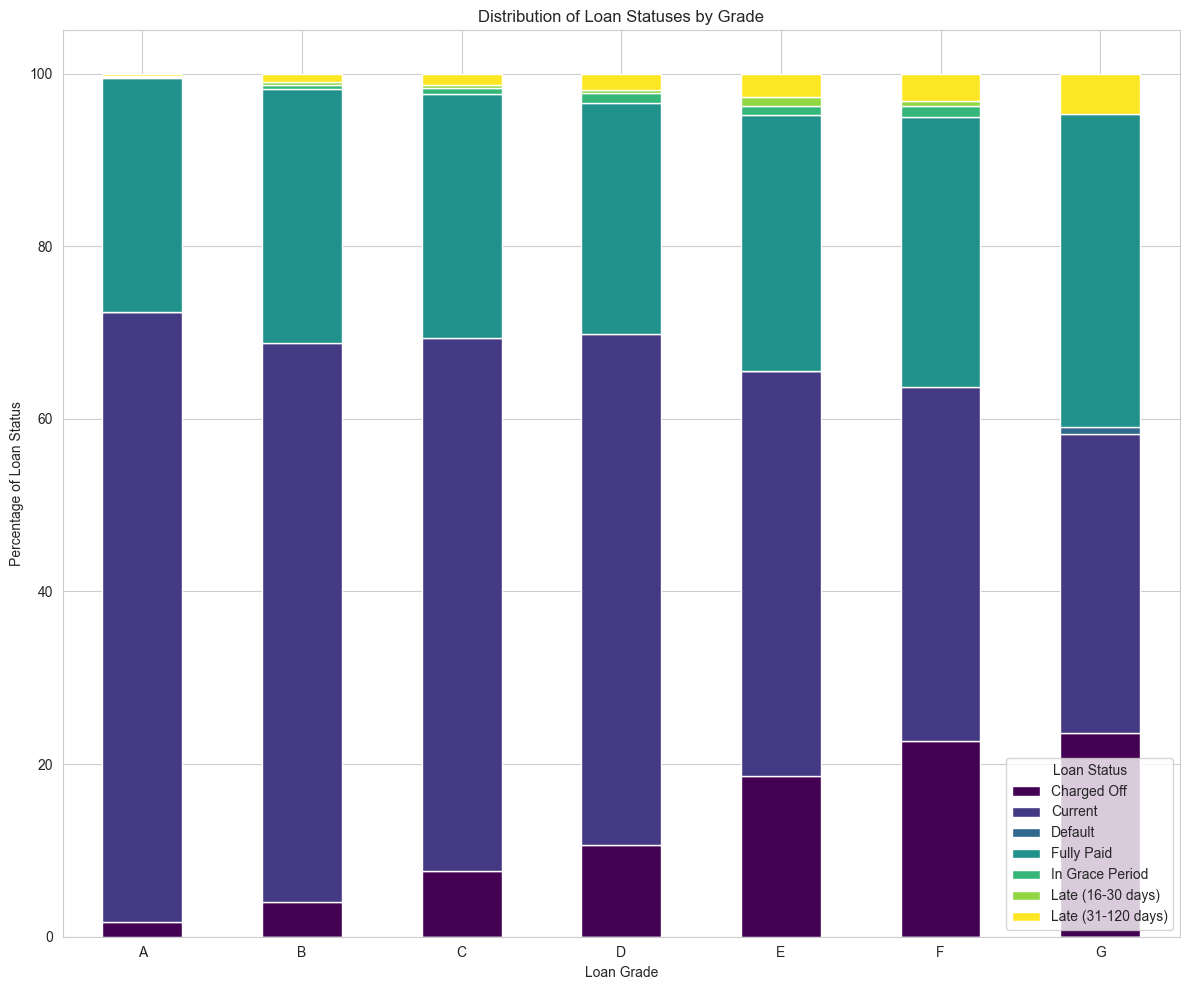

In [32]:
analyze_grade_vs_status(fintech_df_2)

Insights from the Plot
1. Grades A and B show a higher proportion of "Fully Paid" statuses, indicating lower risk and better performance.
2. Grades F and G have a noticeable increase in "Default" and "Charged Off" statuses, suggesting higher risk.
3. Grades D to G show a slight increase in late payment statuses (both "Late 16-30 days" and "Late 31-120 days").
4. The proportion of "Charged Off" increase as we go from grade A to B indicating more loans are considered as bad debt in higher grades.
5. The proportion of "Current" decrease as we go from grade A to B indicating more loans are actively being paid off in lower grades.



## Question 5: How does the loan default rate vary across different loan purposes and income levels? Is there a specific purpose or income bracket associated with a higher likelihood of default?

In [ ]:
def analyze_loan_status_by_purpose_and_income(
    df: pd.DataFrame, 
    income_col: str = 'annual_inc', 
    purpose_col: str = 'purpose', 
    status_col: str = 'loan_status', 
    statuses: List[str] = None
) -> None:
    """
    Analyzes the distribution of each loan status across different loan purposes and income levels,
    and visualizes it using a heatmap for each loan status.

    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data with income, purpose, and status columns.
    - income_col (str): Column name for income (default is 'annual_inc').
    - purpose_col (str): Column name for loan purpose (default is 'purpose').
    - status_col (str): Column name for loan statuses (default is 'loan_status').
    - statuses (List[str]): List of loan statuses to analyze. If None, analyzes all unique statuses.

    Returns:
    - None: Displays heatmaps showing the distribution of each loan status by loan purpose and income level.
    """
    # Define income quantiles for categorizing income levels
    low_income_threshold = df[income_col].quantile(0.33)
    high_income_threshold = df[income_col].quantile(0.66)

    # Categorize income levels
    def categorize_income(income: float) -> str:
        if income <= low_income_threshold:
            return 'Low'
        elif income <= high_income_threshold:
            return 'Medium'
        else:
            return 'High'

    df['income_level'] = df[income_col].apply(categorize_income)

    if statuses is None:
        statuses = df[status_col].unique()

    for status in statuses:
        df[f'is_{status}'] = df[status_col].apply(lambda x: 1 if x == status else 0)

        status_rate = df.groupby([purpose_col, 'income_level'])[f'is_{status}'].mean().unstack(fill_value=0) * 100

        plt.figure(figsize=(12, 8))
        sns.heatmap(status_rate, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': f'{status} Rate (%)'})
        plt.title(f'{status} Rate by Loan Purpose and Income Level')
        plt.xlabel('Income Level')
        plt.ylabel('Loan Purpose')
        plt.tight_layout()
        plt.show()

        df.drop(columns=[f'is_{status}'], inplace=True)


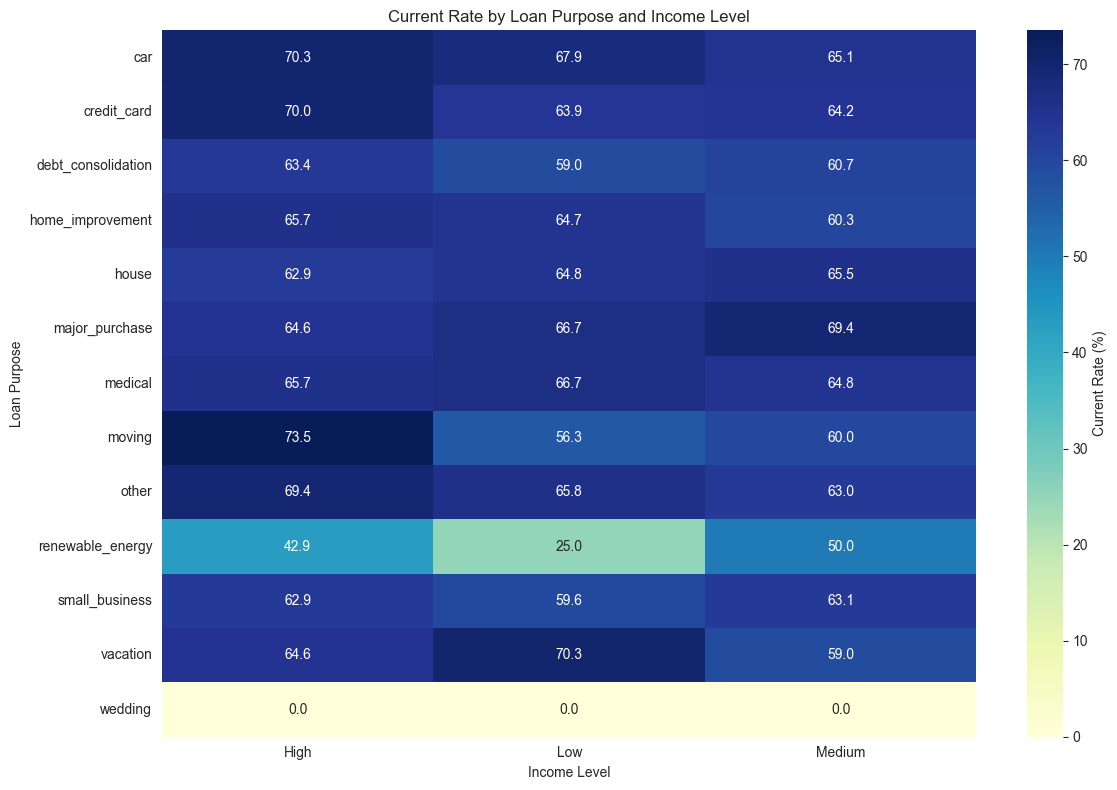

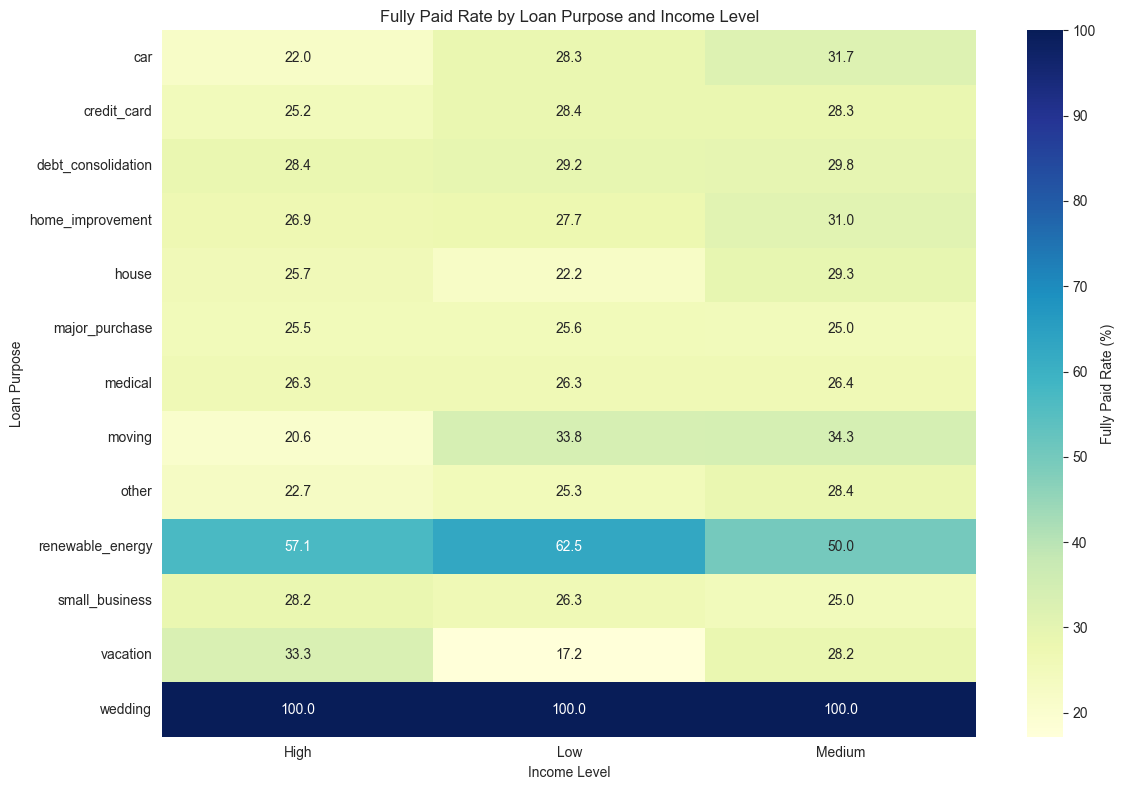

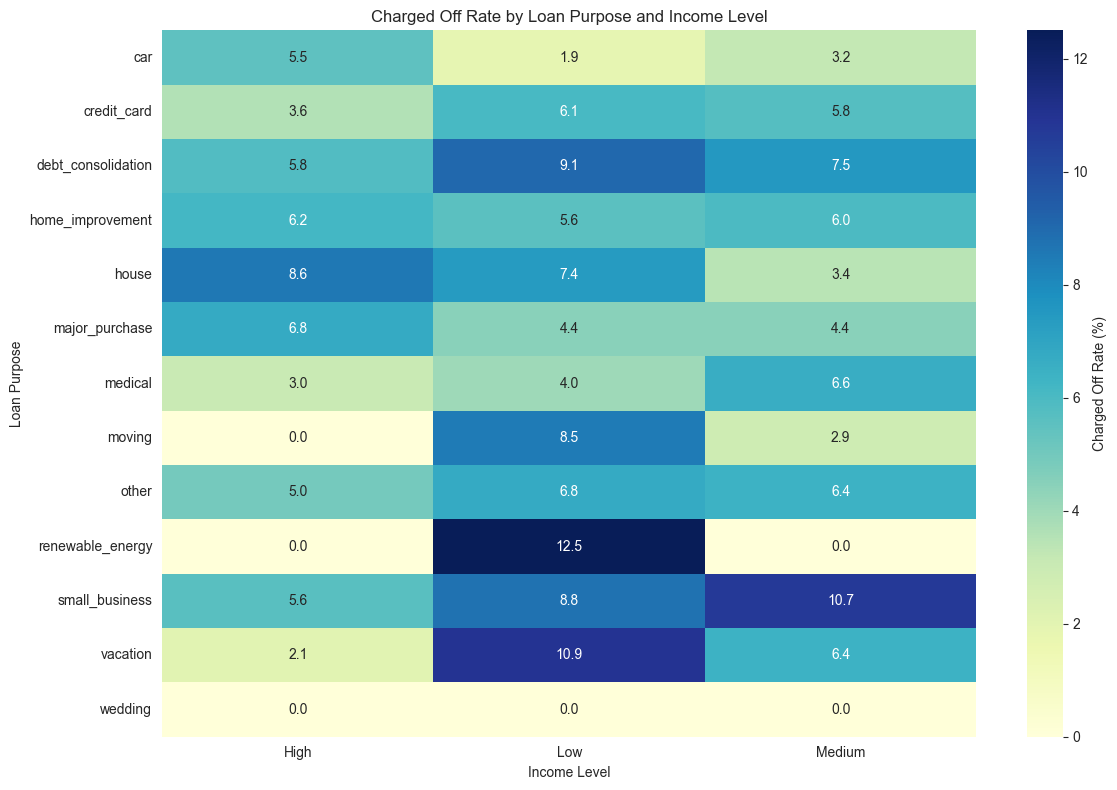

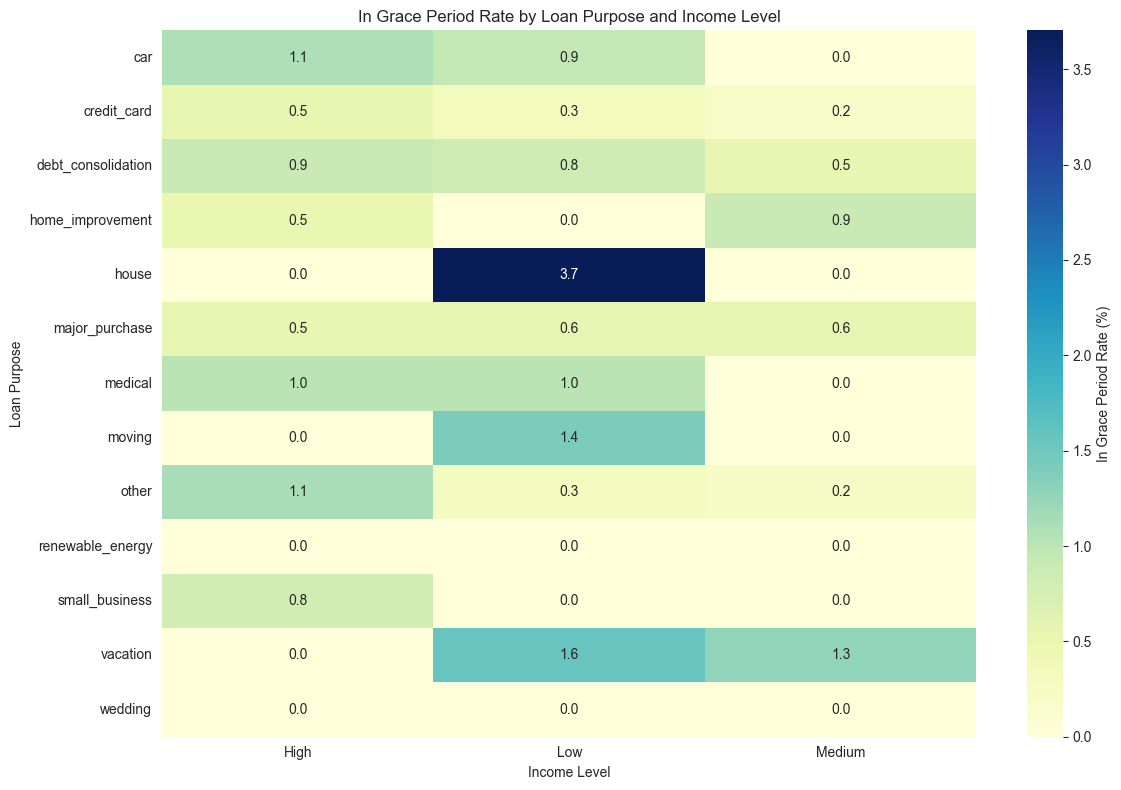

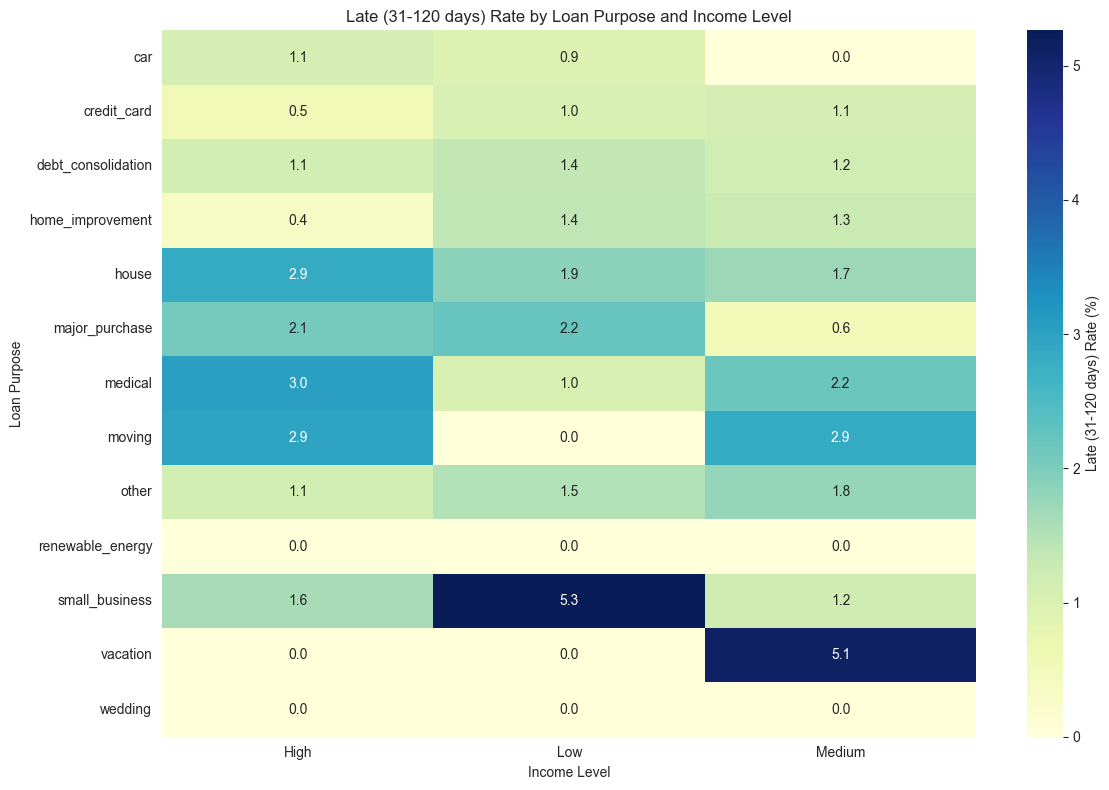

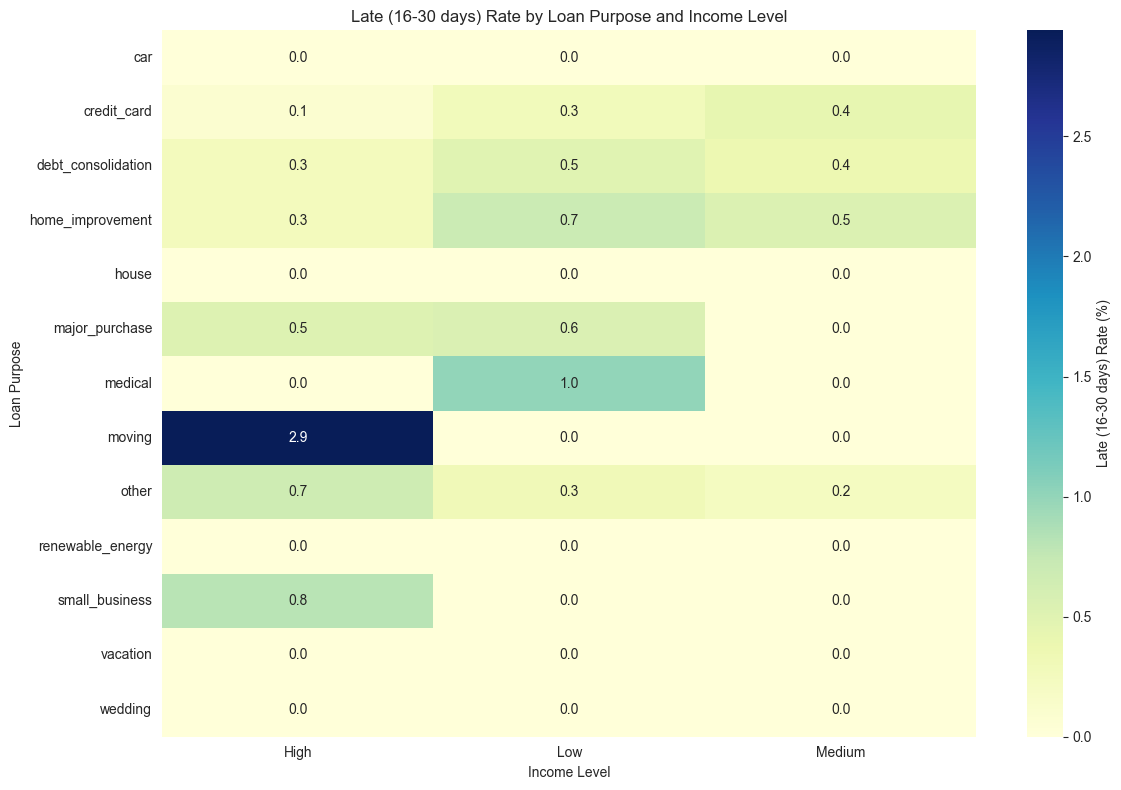

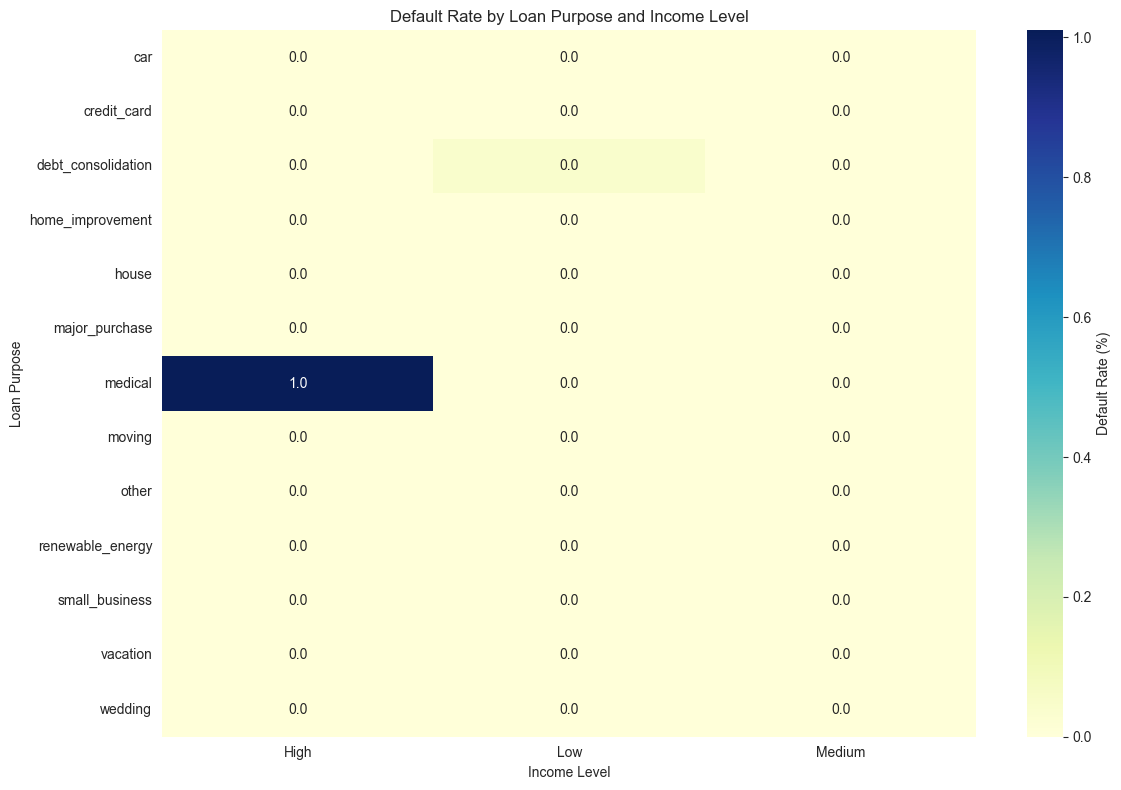

In [34]:
analyze_loan_status_by_purpose_and_income(fintech_df_2)

Insights:
1. Current Rate by Loan Purpose and Income Level
    - The "Current" rate is relatively high across most purposes and income levels, indicating active loans.
    - "Renewable energy" loans have a lower "Current" rate, particularly for low and high income levels, suggesting potential payment delays or non-standard repayment behavior in this category.

2. Fully Paid Rate by Loan Purpose and Income Level
    - The "Fully Paid" rate is highest for "wedding" loans, reaching 100% across all income levels, indicating a strong repayment behavior for wedding loans.
    - "Renewable energy" loans also show a relatively high "Fully Paid" rate, particularly in low income (62.5%) and high income (57.1%) levels, indicating better repayment in these segments.

3. Charged Off Rate by Loan Purpose and Income Level
    - "Debt consolidation" and "Renewable Energy" loans in the low-income bracket show a higher "Charged Off" rate (9.1%) and (12.5%) respectively, suggesting increased risk for this purpose in the low-income category.
    - "Small business" loans in low and medium income levels also show elevated "Charged Off" rates, indicating a potential riskier profile for these groups

4. In Grace Period Rate by Loan Purpose and Income Level
    - The "In Grace Period" rate is relatively low across most categories, indicating limited short-term payment delays.
    - "House" loans in the low-income category have a notable grace period rate (3.7%), suggesting that borrowers may face some challenges in maintaining consistent payments.

5. Late (31-120 Days) Rate by Loan Purpose and Income Level
   - Overall the rates indicate that few people are late (31-120 days) for payments.
   - "Small business" loans in the low-income group also have a higher late rate, indicating challenges with loan repayment in this category.
  
6. Late (16-30 Days) Rate by Loan Purpose and Income Level
   - "Moving" loans in the high-income category have a higher rate of being late within 16-30 days (2.9%), suggesting possible short-term cash flow issues.
   - All categories show very low late rates, indicating not many borrowers are experiencing short-term payment difficulties.

  
7. Default Rate by Loan Purpose and Income Level
   - "Medical" loans show a default rate of 1% in the high-income group, which is notable as this is the only significant default observed across all categories.
   - The almost zero default rates across other purposes and income levels suggest that outright default is relatively rare in this dataset.

## Question 6: How does the average loan amount vary by state and income level? Are there certain states where lower-income borrowers are more likely to take out larger loans compared to other states?

In [294]:
def analyze_loan_amount_by_state_and_income(
    df: pd.DataFrame, 
    state_col: str = 'addr_state', 
    income_col: str = 'annual_inc', 
    loan_col: str = 'loan_amount'
) -> None:
    """
    Analyzes the average loan amount by state and income level, 
    and visualizes it using a heatmap.

    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data with state, income, and loan amount columns.
    - state_col (str): Column name for state (default is 'addr_state').
    - income_col (str): Column name for income (default is 'annual_inc').
    - loan_col (str): Column name for loan amount (default is 'loan_amnt').

    Returns:
    - None: Displays a heatmap showing the average loan amount by state and income level.
    """
    low_income_threshold = df[income_col].quantile(0.33)
    high_income_threshold = df[income_col].quantile(0.66)

    def categorize_income(income: float) -> str:
        if income <= low_income_threshold:
            return 'Low'
        elif income <= high_income_threshold:
            return 'Medium'
        else:
            return 'High'

    df['income_level'] = df[income_col].apply(categorize_income)

    avg_loan_by_state_income = df.groupby([state_col, 'income_level'])[loan_col].mean().unstack(fill_value=0)

    plt.figure(figsize=(15, 15))
    sns.heatmap(avg_loan_by_state_income, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average Loan Amount ($)'})
    plt.title('Average Loan Amount by State and Income Level')
    plt.xlabel('Income Level')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()


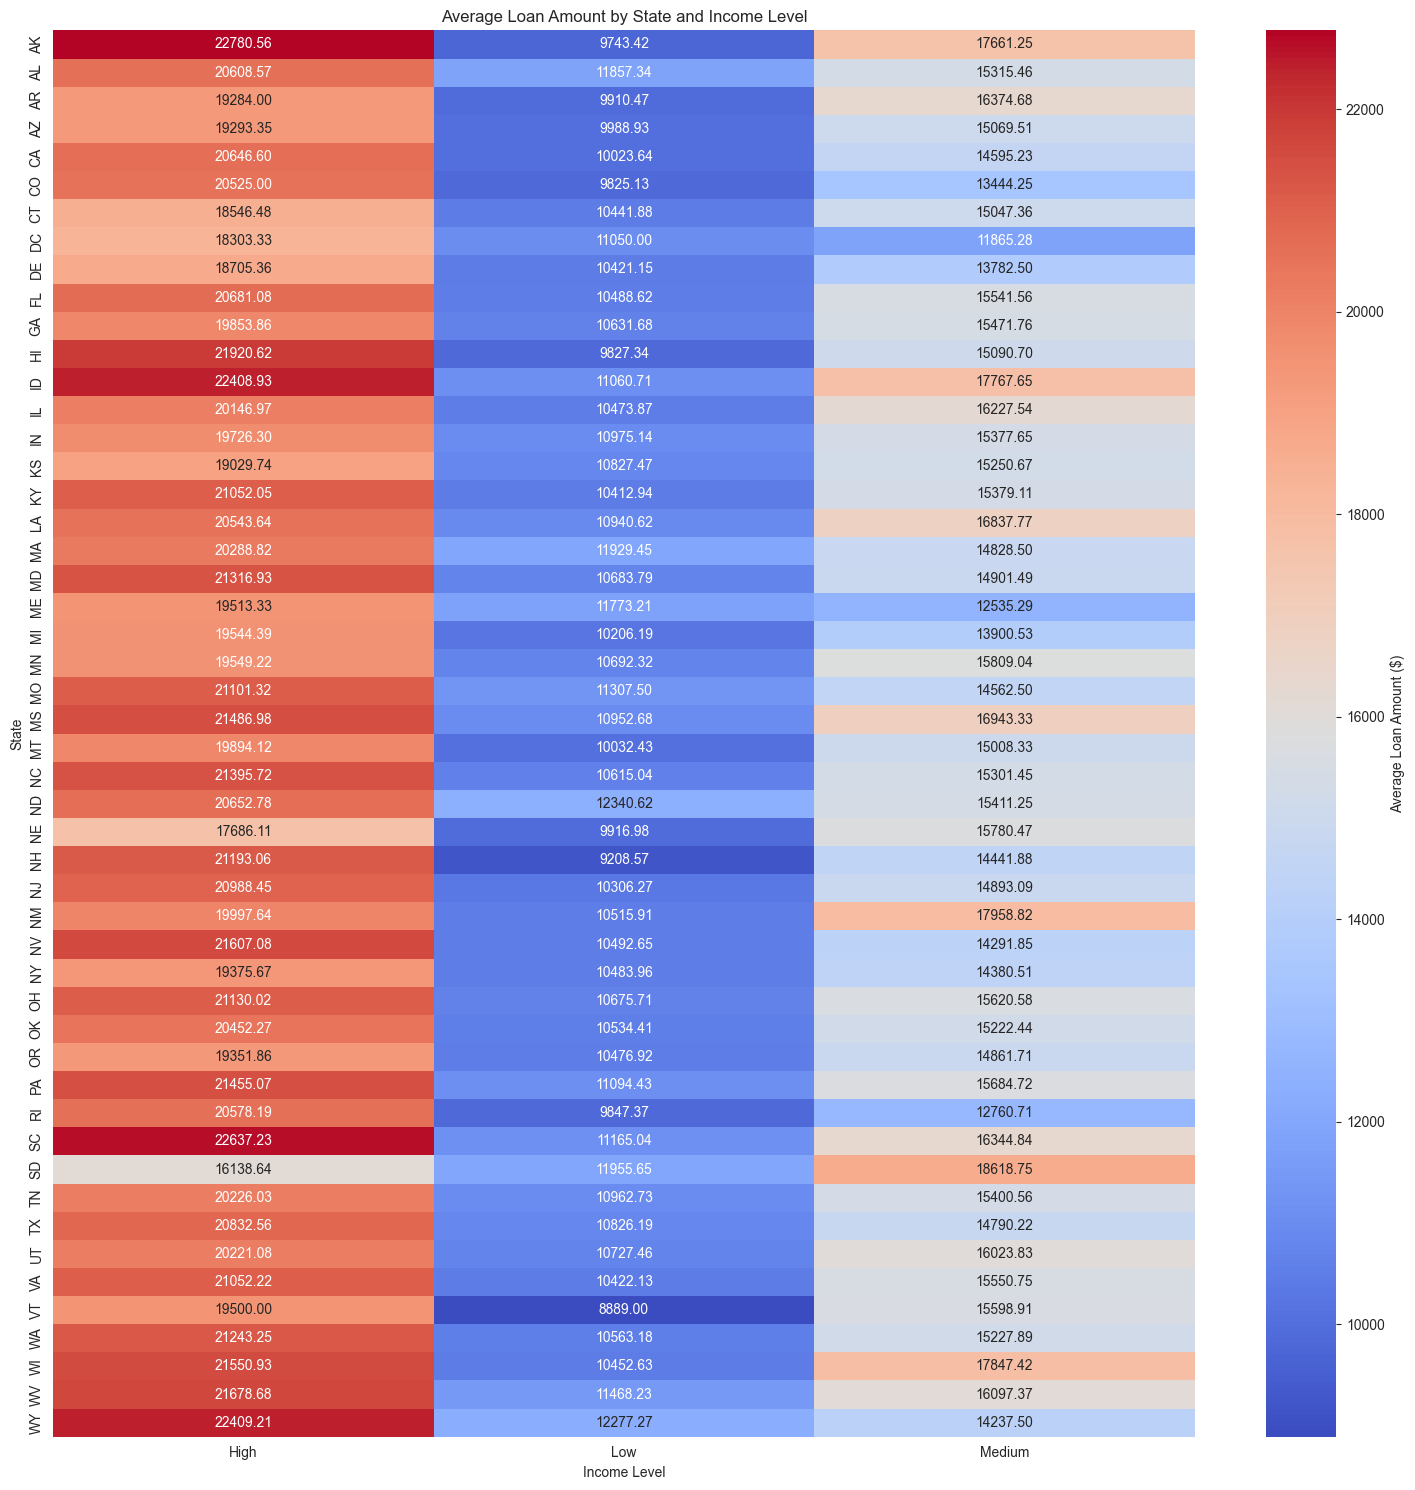

In [295]:
analyze_loan_amount_by_state_and_income(fintech_df_2)

## Question 7: Which states have the highest average loan amounts coupled with high rates of bad debt (defined as loans in default or charged-off status)?

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_high_risk_states(
    df: pd.DataFrame, 
    loan_col: str = 'loan_amount', 
    status_col: str = 'loan_status', 
    high_loan_threshold: float = None, 
    bad_debt_statuses: list = ['Default', 'Charged Off']
) -> pd.DataFrame:
    """
    Identifies states with both high average loan amounts and high bad debt rates (default or charged off).
    Additionally, visualizes these states on a scatter plot.

    Parameters:
    - df (pd.DataFrame): DataFrame containing loan data.
    - loan_col (str): Column name for loan amount (default is 'loan_amnt').
    - status_col (str): Column name for loan status (default is 'loan_status').
    - high_loan_threshold (float): Threshold for defining high loan amounts. If None, it is set to the dataset's 66th percentile.
    - bad_debt_statuses (list): List of statuses indicating bad debts (default is ['Default', 'Charged Off']).

    Returns:
    - pd.DataFrame: DataFrame with states ranked by average loan amount and bad debt rate.
    """
    if high_loan_threshold is None:
        high_loan_threshold = df[loan_col].quantile(0.50)
    
    df['is_bad_debt'] = df[status_col].apply(lambda x: 1 if x in bad_debt_statuses else 0)

    state_summary = df.groupby('addr_state').agg(
        bad_debt_rate=('is_bad_debt', 'mean'),
        avg_loan_amount=(loan_col, 'mean')
    ).reset_index()

    state_summary = state_summary.sort_values(by=['bad_debt_rate', 'avg_loan_amount'], ascending=[False, False]).reset_index(drop=True)

    high_risk_states = state_summary[
        (state_summary['avg_loan_amount'] >= high_loan_threshold) &
        (state_summary['bad_debt_rate'] > state_summary['bad_debt_rate'].mean())
    ]

    high_risk_states = high_risk_states.sort_values(by=['bad_debt_rate', 'avg_loan_amount'], ascending=[False, False]).reset_index(drop=True)
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=state_summary, x='avg_loan_amount', y='bad_debt_rate', hue=(state_summary['addr_state'].isin(high_risk_states['addr_state'])),
                    palette={True: 'red', False: 'blue'}, legend=False)
    
    for _, row in state_summary.iterrows():
        is_in_high_risk = row['addr_state'] in high_risk_states['addr_state'].values
        plt.text(row['avg_loan_amount'], row['bad_debt_rate'], row['addr_state'], horizontalalignment='right', fontsize=10, color='darkred' if is_in_high_risk else 'blue')

    plt.axvline(x=high_loan_threshold, color='grey', linestyle='--', label='High Loan Threshold')
    plt.axhline(y=state_summary['bad_debt_rate'].mean(), color='grey', linestyle='--', label='Average Bad Debt Rate')

    plt.title('Average Loan Amount vs. Bad Debt Rate by State')
    plt.xlabel('Average Loan Amount ($)')
    plt.ylabel('Bad Debt Rate (%)')
    plt.legend(['High Loan Threshold', 'Average Bad Debt Rate'])
    plt.tight_layout()
    plt.show()

    return state_summary, high_risk_states



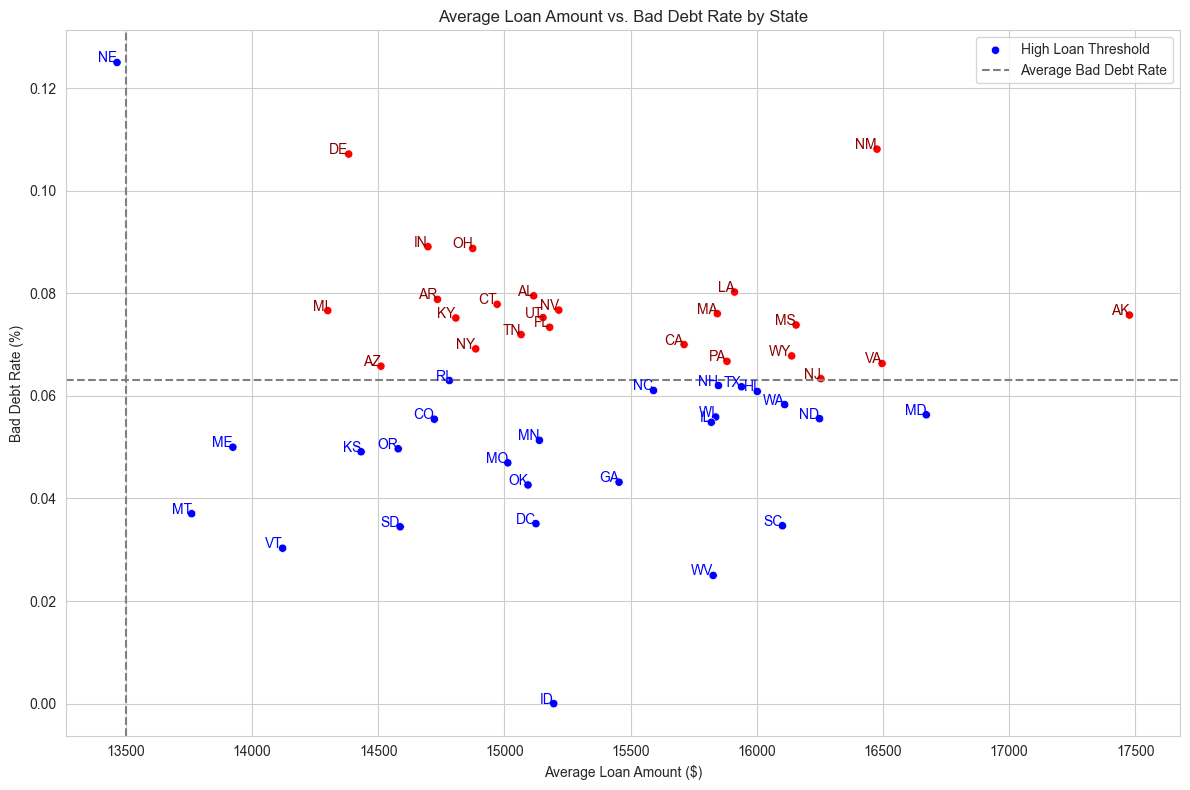

In [336]:
state_summary, high_risk_states = analyze_high_risk_states(fintech_df_2)

In [337]:
high_risk_states

,addr_state,bad_debt_rate,avg_loan_amount
0,NM,0.108108,16476.182432
1,DE,0.107143,14383.035714
2,IN,0.089087,14697.104677
3,OH,0.088745,14874.431818
4,LA,0.080247,15911.805556
5,AL,0.079511,15116.055046
6,AR,0.078818,14734.852217
7,CT,0.077859,14971.228710
8,NV,0.076726,15215.473146
9,MI,0.076623,14300.129870


In [341]:
fintech_df_2[['addr_state', 'state_name']][fintech_df_2['state']=='WV']

,addr_state,state_name
customer_id,,
Yic8JFx4ZjJceGExLihceDhjXHhmMFx4ZGZceDg4XHhiMVx4YzM3XHhhOFx4ZjV9XHhlNVx4ZGU/SFx4YWRceDExXHhmNiA0XHRceGIwXHhhZkdcblx4ZmVceGQwJw==,WV,West Virginia
YidceGI5XHhiZVx4OWFceDkwXHhmM1x4OWY0Ilx4ODVceGI0XHgxNiFceDBjXHgxNlx4ODlceGUyXHg3ZiV0aVx4ZmJ5XHhlN1x4ZDVceDE0flx4OGZceGY2SHVceDk4XHg5OCc=,WV,West Virginia
YidceGUzXHhjNlx4ZTdceDE4W1x4N2ZceGZkM1x4YWM1IVx4OWFceDFjXHgxYVx4YzZqXHhhMlx4MTNQXHhlZlx4ZTRceGE3XHhkMlx4ZDdceDBiXHhmMHNceDExXHhhZTNceDAxXHgxOSc=,WV,West Virginia
YidrSlx4YjRceGYyNlx4YmNJO1JdKnJrXHhlMSV0XHhhYlx4ZTdnQUtceGQxXHhkYz5ceDkxSDRSKVx4YzRceGQyQCc=,WV,West Virginia
YidceDFlXHgwZjxceDAxXHgxZFx4OTBzRGpceGJkXHg4OXxceGIwXHhhMi1ceGMyXHgwZVx4OTVceGJiXHgwYmdceDE4XHhjOVx4ZmZceGViWVx4MTBHXHg4NVx4MDNceDFjcic=,WV,West Virginia
...,...,...
YidceGUxXHhmNlx4MTQ5XHhiZlxyXHhlNHRcXFx4YmZQXHg4OT0wXHhlZVx4ODNtXFxceGFkXHg5MitmdkRceDE1XHg5Nlx4ODhceGQyXHhkZi9VXHg4Mic=,WV,West Virginia
YidceDg3N0RVLUBceGE5XHhjMVx4MTEtXHhkZHVceDA2QFx4ZjVcXFx4MDQyXHhhN1x4YmY3XHgxMkdceDFjXHgxZkVSVS5ceGM4XHhhNFx4MWYn,WV,West Virginia
YiciLlx4MWJceDE5XHhhYSNceGYyd25ceDkwXHgwMVx4ODZceGE1XHhhM1x4YTJceDg3XHhjOU0uNVx4MGZfTStceGRkXHgwNlx4ODFceGFjXHgxMFx4ZjFceDAzXHhiZic=,WV,West Virginia


Insights fro the df and the plot:

1. States in red represent those that meet the criteria for high average loan amounts and higher-than-average bad debt rates. These states have bad debt rates above the overall average, indicating increased financial risk.

2. Many high-risk states, like New Mexico (NM) and Delaware (DE), have particularly high bad debt rates (>= 10%) compared to others. These states also have moderate to high average loan amounts, suggesting that larger loans might correlate with higher bad debt in certain regions. Delaware (DE) has a high bad debt rate (10.71%) and a lower average loan amount ($14,383), but its rate suggests potential risk.
Indiana (IN) and Ohio (OH) follow NM and DE with bad debt rates close to 9%, indicating consistent repayment challenges.
   
1. Blue points represent states with lower bad debt rates or lower average loan amounts. For example,  West Virginia (WV) and Idaho (ID) despite having a relatively high loan amount, has a very low bad debt rate. This may indicate lower financial risk in that state despite high borrowing amounts.

In [338]:
state_summary

,addr_state,bad_debt_rate,avg_loan_amount
0,NE,0.125000,13465.178571
1,NM,0.108108,16476.182432
2,DE,0.107143,14383.035714
3,IN,0.089087,14697.104677
4,OH,0.088745,14874.431818
5,LA,0.080247,15911.805556
6,AL,0.079511,15116.055046
7,AR,0.078818,14734.852217
8,CT,0.077859,14971.228710
9,NV,0.076726,15215.473146


# Data Cleaning

### Cleaning the columns

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df: pd.DataFrame, column: str):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

def calculate_whiskers(df: pd.DataFrame, column: str):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    iqr_outliers_mask = (df[column] < lower_whisker) | (df[column] > upper_whisker)
    return iqr_outliers_mask, lower_whisker, upper_whisker

def remove_outliers_using_boxplot(df: pd.DataFrame, column: str) -> pd.DataFrame:
    plot_boxplot(df, column)
    iqr_outliers_mask, _, _ = calculate_whiskers(df, column)
    df = df[~iqr_outliers_mask]
    return df

In [36]:
def plot_hist(df: pd.DataFrame, column: str):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [37]:
def plot_kde(df: pd.DataFrame, column: str):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [38]:
def convert_to_z_score(df: pd.DataFrame, column: str):
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

In [39]:
def plot_z_score(df: pd.DataFrame, column: str) -> pd.Series:
    z_score = (df[column] - df[column].mean()) / df[column].std()
    plt.figure(figsize=(8, 6))
    sns.kdeplot(z_score, shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    return z_score

def remove_outliers_using_z_score(df: pd.DataFrame, column: str, threshold: float=3) -> pd.DataFrame:
    z_score = (df[column] - df[column].mean()) / df[column].std()
    outliers_mask = z_score.abs() > threshold
    df = df[~outliers_mask]
    return df

In [40]:
def get_orig_col_name(col_name: str) -> str:
    extra_names = ['standardized', 'cleaned', 'imputed', 'labelEncoded', 'log', 'sqrt', 'norm', 'log1p', 'boxcox']
    
    orig_col_name = col_name
    for extra_name in extra_names:
        orig_col_name = orig_col_name.replace(f'_{extra_name}', '')
    return orig_col_name

In [41]:
def log_transform_col(df: pd.DataFrame, col: str) -> pd.DataFrame:
    orig_col_name = get_orig_col_name(col)
    if df[col].min() <= 0:
        df[f'{orig_col_name}_log1p'] = np.log1p(df[col])
    else:
        df[f'{orig_col_name}_log'] = np.log(df[col])
    
    return df

def sqrt_transform_col(df: pd.DataFrame, col: str) -> pd.DataFrame:
    orig_col_name = get_orig_col_name(col)
    df[f'{orig_col_name}_sqrt'] = np.sqrt(df[col])
    return df



def apply_boxcox(df: pd.DataFrame, column_name: str) -> Tuple[pd.DataFrame, float]:
    """
    Applies Box-Cox transformation to a specified column to make it more normally distributed.
    
    Parameters:
    - df: DataFrame containing the column to be transformed
    - column_name: Name of the column to transform
    
    Returns:
    - Transformed column and lambda value used for the transformation
    """
    if (df[column_name] <= 0).any():
        df[column_name] = df[column_name] + abs(df[column_name].min()) + 1

    transformed_data, fitted_lambda = boxcox(df[column_name])

    df[f'{column_name}_boxcox'] = transformed_data

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original data distribution
    sns.histplot(df[column_name], ax=axes[0], kde=True)
    axes[0].set_title(f'Original Distribution of {column_name}')

    # Box-Cox transformed data distribution
    sns.histplot(transformed_data, ax=axes[1], kde=True)
    axes[1].set_title(f'Box-Cox Transformed Distribution of {column_name} (λ = {fitted_lambda:.2f})')

    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    probplot(df[column_name], dist="norm", plot=ax[0])
    ax[0].set_title(f"QQ Plot of Original {column_name}")
    probplot(transformed_data, dist="norm", plot=ax[1])
    ax[1].set_title(f"QQ Plot of Transformed {column_name} (λ = {fitted_lambda:.2f})")

    plt.show()

    return df, fitted_lambda


def normalization(df: pd.DataFrame, col: str, type_of_norm: str) -> pd.DataFrame:
    assert type_of_norm in ['standard', 'min_max'], 'type_of_norm should be either standard or min_max'
    orig_col_name = get_orig_col_name(col)
    if type_of_norm == 'standard':
        scaler = StandardScaler()
    elif type_of_norm == 'min_max':
        scaler = MinMaxScaler()
    df[f'{orig_col_name}_norm'] = scaler.fit_transform(df[[col]])
    return df
    


#### Lets make an encoding function in case we need it 

In [42]:
global_lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])

def encode_col(df: pd.DataFrame, type_of_encoding: str, col_name: str, need_to_sort: bool=False) -> pd.DataFrame:
    assert type_of_encoding in ['label', 'onehot'], 'Invalid type of encoding. Please choose either "label" or "onehot"'
    
    global global_lookup_table

    orig_col_name = get_orig_col_name(col_name)

    lookup_table = pd.DataFrame()
    if type_of_encoding == 'label':
        if need_to_sort:
            sorted_values = sorted(df[col_name].dropna().unique())
            df[f'{orig_col_name}_labelEncoded'] = pd.Categorical(df[col_name], categories=sorted_values, ordered=True).codes
            lookup_table['Original'] = sorted_values
        else:
            df[f'{orig_col_name}_labelEncoded'] = pd.Categorical(df[col_name]).codes
            lookup_table['Original'] = df[col_name].unique()

        lookup_table['Encoded'] = range(len(lookup_table['Original']))
        
    elif type_of_encoding == 'onehot':
        unique_values = df[col_name].unique()
        lookup_table['Original'] = unique_values
        lookup_table['Encoded'] = [f'{orig_col_name}_{val}' for val in unique_values]
        one_hot_df = pd.get_dummies(df[col_name], prefix=orig_col_name, dtype=int)
        df = pd.concat([df, one_hot_df], axis=1)


    lookup_table['Column'] = orig_col_name
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
    
    return df


#### Drop Duplicates

no duplicates so no need to drop anything

In [43]:
fintech_df_2[fintech_df_2.duplicated()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,income_level,letter_grade
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,


### emp_title

In [44]:
fintech_df_2['emp_title'].value_counts()

emp_title
Teacher                            468
Manager                            402
Owner                              229
Driver                             212
Registered Nurse                   188
                                  ... 
Quality Management Specialist        1
VP-Information Security Officer      1
elevator constructor                 1
Registered Nurse Mgr                 1
Medical Esthetician                  1
Name: count, Length: 13165, dtype: int64

In [45]:
fintech_df_2['emp_title'].nunique()

13165

In [46]:
fintech_df_2['emp_title'].unique()

array(['president/owner', 'PETTY OFFICER FIRST CLASS', 'nyco ', ...,
       'Scm', 'Sr. Marketing Administrator', 'Medical Esthetician'],
      dtype=object)

In [47]:
def clean_str_in_col(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[col_name] = df[col_name].str.lower().str.strip()
    return df

In [48]:
fintech_df_2 = clean_str_in_col(fintech_df_2, 'emp_title')

In [49]:
fintech_df_2['emp_title'].nunique()

10977

#### Impute

In [50]:
fintech_df_2['emp_title'].isna().sum()

2328

In [51]:
'unknown' in fintech_df_2['emp_title'].unique()

False

In [52]:
def impute_emp_title(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[f'{col_name}_imputed'] = df[col_name].fillna('unknown')

    global global_lookup_table
    lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    lookup_table['Column'] = [col_name]
    lookup_table['Original'] = [np.nan]
    lookup_table['Encoded'] = ['unknown']
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
    return df

In [53]:
fintech_df_2 = impute_emp_title(fintech_df_2, 'emp_title')

In [54]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown


In [55]:
fintech_df_2['emp_title_imputed'].isna().sum()

0

### emp_length

In [56]:
fintech_df_2['emp_length'].unique()

array(['10+ years', '4 years', '2 years', '6 years', '1 year', '5 years',
       '7 years', nan, '< 1 year', '9 years', '3 years', '8 years'],
      dtype=object)

In [57]:
def clean_emp_length(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[f'{col_name}_cleaned'] = df[col_name].str.replace('years', '').str.replace('year', '').str.replace('< 1', '0.5').str.replace('10+', '11').str.strip()
    df[f'{col_name}_cleaned'] = df[f'{col_name}_cleaned'].astype(float)
    return df

In [58]:
fintech_df_2 = clean_emp_length(fintech_df_2, 'emp_length')

In [59]:
fintech_df_2['emp_length_cleaned'].unique()

array([11. ,  4. ,  2. ,  6. ,  1. ,  5. ,  7. ,  nan,  0.5,  9. ,  3. ,
        8. ])

#### Impute

In [60]:
fintech_df_2['emp_length_cleaned'].isna().sum()

1832

In [61]:
fintech_df_2[fintech_df_2['emp_length_cleaned'].isna()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,income_level,letter_grade,emp_title_imputed,emp_length_cleaned
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidcXFx4MTlceGQ4XHhkNlx4YWMqXHhkMH5GU1x4ODlceGMyXHhjMFx4ZDJceDBiXHgxYlx4MGZceDlkXHhmMFx4ZDdOXHg5ZVx4YzZXKCRceDg2XHgxY1x4ZjRceGMzXHhkZCEn,NaN,NaN,MORTGAGE,85008.0,NaN,Verified,125xx,NY,22726.0,295441.0,245551,Charged Off,30000.0,NY,30000.0,60 months,0.1561,15,14 February 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation,High,C,unknown,NaN
YidceGUwJFx4MTVlXHhlNVx4ODRceGE3WXNPPlx4YmZceGMzXHg5OGlceGVlXiZceGJkXHg5OVx4YjZ0XHJceDhkXHg5MVx4ZGRceDEza1x4YzJoXHg4OVx4ZGYn,NaN,NaN,RENT,26727.0,NaN,Verified,145xx,NY,1048.0,15723.0,19228,Current,4000.0,NY,4000.0,36 months,0.1408,12,17 September 2017,False,Individual,debt_consolidation,Debt consolidation,Low,C,unknown,NaN
YidceGZmXHJceGFiXHhhNlx4YmJceDdmXHhjOW9ceDk3XHhmODhceDhmW1x4YWV9XHg5ZSJceGY0XHgxNFx4YjhceDAyXHhiODVCXHhmY09ceDEwQFx4YWElYFx4MWMn,NaN,NaN,MORTGAGE,82000.0,142000.0,Source Verified,151xx,PA,23919.0,215271.0,206514,Current,21000.0,PA,21000.0,60 months,0.1774,15,19 July 2019,False,Joint App,other,Other,Medium,C,unknown,NaN
YidceDk0XHgxMFx4OTZceGIyXHhhOFx4Y2FVXHg5NThceDFjXHgwMVx4ZjMpW1x4MDNnXHg4OVx4ZjBceGVkXHhmOFx4ZmVtMFhDXHgxMFx4Yzl9XHhmZFx4OTA7NSc=,NaN,NaN,MORTGAGE,65000.0,NaN,Verified,473xx,IN,11175.0,122921.0,16264,Charged Off,3800.0,IN,3800.0,36 months,0.1199,11,16 March 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation,Medium,C,unknown,NaN
YidceDkyKT1ceDEyXHhhZm5ceGFlXHhiM1x4ZWNceDg1M1x4ZGZBMEciXHhhMFx4ZjNceDk3QFVceDlkXHgxMD9ceDExXHg5MFx4MGZceDhhXHg4M1x4ZDRXXHhkMSc=,NaN,NaN,MORTGAGE,94000.0,NaN,Not Verified,087xx,NJ,3752.0,60032.0,228945,Fully Paid,25000.0,NJ,25000.0,60 months,0.1774,13,19 August 2019,False,Individual,debt_consolidation,Debt consolidation,High,C,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceDAzXHg4Zlx4ZDhceDlhXHgwNz9ceDE0XHhlMXRceGRhJFx4YmYvKlx4MGNceGU0XHhlOFx4ZGZceGFhYFlceGVhXHg4Y1x4ZDdceGFlXHg5NlZceDE0XHg5ZXZceDEyXHgwNCc=,NaN,NaN,MORTGAGE,113000.0,NaN,Not Verified,335xx,FL,30072.0,300719.0,123082,Current,12000.0,FL,12000.0,36 months,0.1524,12,19 November 2019,False,Individual,home_improvement,Home improvement,High,C,unknown,NaN
YidceDk1XHhlZERjNVx4MTJ2XHg3Zlx4MTM3IVx4ZmZ7a1x4OTVceGNjPi87XHgwNVlceDE4XHhlMClceGVlP1x4ZmNHM1x4MWJceDA1eyc=,NaN,NaN,RENT,23000.0,NaN,Verified,466xx,IN,2529.0,2529.0,20596,Current,4200.0,IN,4200.0,36 months,0.0756,2,19 March 2019,False,Individual,credit_card,Credit card refinancing,Low,A,unknown,NaN
YicvXHgwZWlceGYzXHhlZlx4ZDdceGEyPnRceGI0UVx4ZTBceGYwXHhkNlJYT1M2dVxcXHhjNElceGQ0KEtceGM0IVx4MTZceDExLVx4OTQn,NaN,NaN,RENT,34832.0,NaN,Verified,913xx,CA,2104.0,16828.0,137256,Charged Off,13925.0,CA,13925.0,36 months,0.1499,12,17 March 2017,False,Individual,debt_consolidation,Debt consolidation,Low,C,unknown,NaN


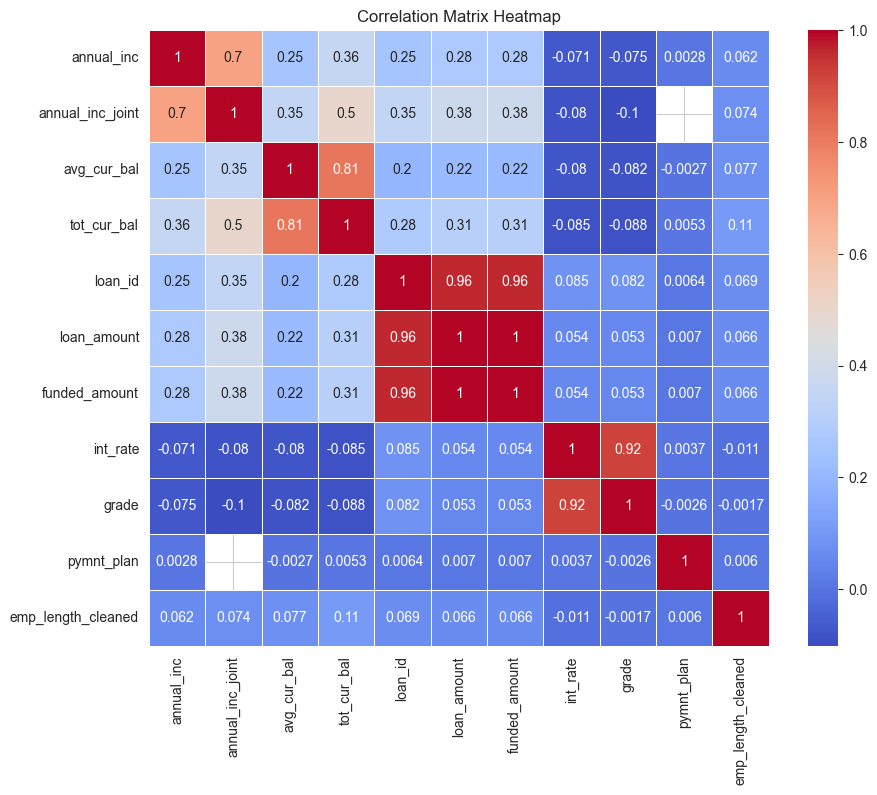

In [62]:
draw_corr_matrix(fintech_df_2, figsize=(10, 8))

In [63]:
def impute_emp_length_by_income_bin(df: pd.DataFrame, bins: int=5, col_name: str='emp_length_cleaned', col_name_2: str='annual_inc') -> pd.DataFrame:
    """
    Imputes 'Emp Length' based on the mode within equal-frequency bins of 'Annual Inc'.
    
    Parameters:
    - data: DataFrame containing 'Emp Length' and 'Annual Inc' columns.
    - bins: Number of equal-frequency bins to create for 'Annual Inc'.
    - col_name: Name of the 'Emp Length' column.
    - col_name_2: Name of the 'Annual Inc' column.
    
    Returns:
    - DataFrame with imputed 'Emp Length' column.
    """
    
    df[f'{col_name_2}_bins'] = pd.qcut(df[col_name_2], q=bins, labels=False)
    
    income_bin_mode_emp_length = df.groupby(f'{col_name_2}_bins')[col_name].agg(lambda x: x.mode().iloc[0])
    
    orig_col_name = get_orig_col_name(col_name)
    df[f'{orig_col_name}_imputed'] = df.apply(
        lambda row: income_bin_mode_emp_length[row[f'{col_name_2}_bins']] if pd.isna(row[col_name]) else row[col_name],
        axis=1
    )
    
    return df


Imputing emp_length using annual_inc suggests that the missingness mechanism is Missing at Random (MAR). This indicates that the likelihood of missing values in emp_length is related to the observed annual_inc values. By using income information to fill in missing employment lengths, we assume that the missing values are dependent on this available data, making it a more informed imputation strategy.

In [64]:
fintech_df_2 = impute_emp_length_by_income_bin(fintech_df_2, bins=5, col_name='emp_length_cleaned', col_name_2='annual_inc')

In [65]:
fintech_df_2['emp_length_cleaned'].value_counts().sort_values(ascending=False)

emp_length_cleaned
11.0    8855
0.5     2460
2.0     2364
3.0     2212
1.0     1795
4.0     1608
5.0     1603
7.0     1146
6.0     1142
8.0     1042
9.0      971
Name: count, dtype: int64

In [66]:
fintech_df_2['emp_length_imputed'].value_counts().sort_values(ascending=False)

emp_length_imputed
11.0    10687
0.5      2460
2.0      2364
3.0      2212
1.0      1795
4.0      1608
5.0      1603
7.0      1146
6.0      1142
8.0      1042
9.0       971
Name: count, dtype: int64

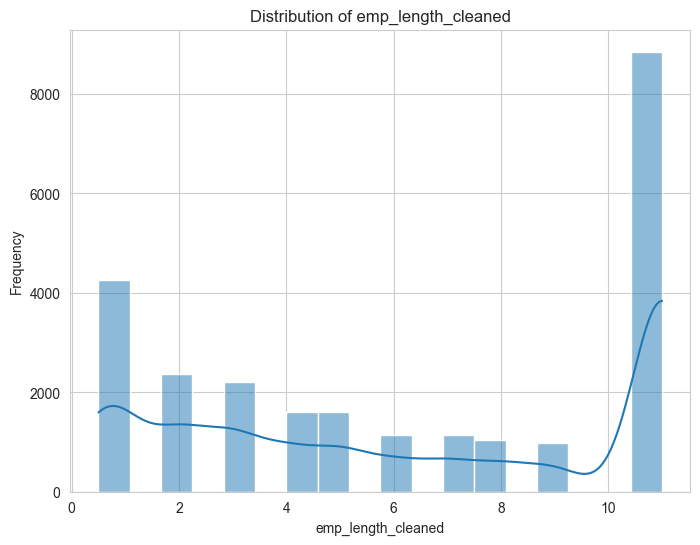

In [67]:
plot_hist(fintech_df_2, 'emp_length_cleaned')

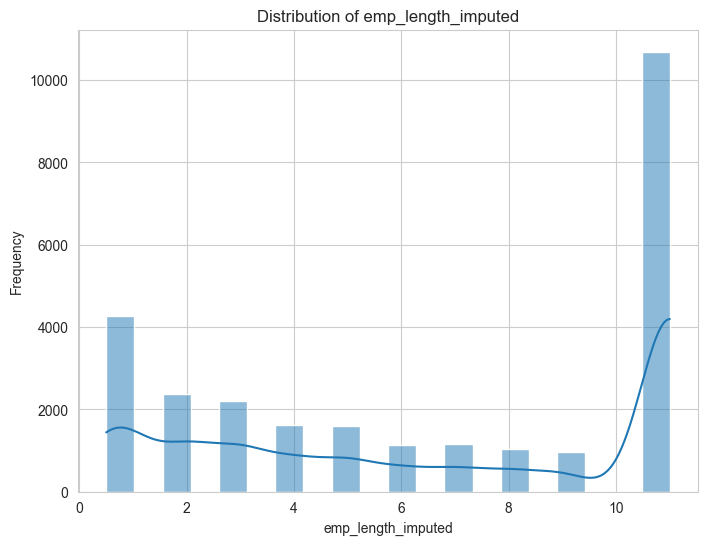

In [68]:
plot_hist(fintech_df_2, 'emp_length_imputed')

In [69]:
# def impute_emp_length(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
def impute_emp_length_with_default(df: pd.DataFrame, col_name: str, default_value: int=0) -> pd.DataFrame:
    """
    Imputes 'Emp Length' with a default value.
    
    Parameters:
    - data: DataFrame containing 'Emp Length' column.
    - default_value: Value to impute for missing 'Emp Length'.
    
    Returns:
    - DataFrame with imputed 'Emp Length' column.
    """
    orig_col_name = get_orig_col_name(col_name)
    df[f'{orig_col_name}_imputed'] = df[col_name].fillna(default_value)
    
    return df


Imputing missing emp_length values with a default value, like 0, assumes that the missingness mechanism is Missing Completely at Random (MCAR). This means that the missing values are considered random and unrelated to any other variable in the dataset, including emp_length itself. This approach treats missing values as arbitrary, implying no specific pattern or relationship influencing their occurrence.

In [70]:
# fintech_df_2 = impute_emp_length_with_default(fintech_df_2, 'emp_length_cleaned', default_value=0)

### home_ownership

In [71]:
fintech_df_2['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'ANY'], dtype=object)

In [72]:
fintech_df_2['home_ownership'].isna().sum()

0

#### Encode

I used one-hot encoding for the home_ownership column instead of label encoding because it treats each category as a distinct and independent feature. One-hot encoding is more suitable for categorical variables that don’t have an inherent ordinal relationship, like home_ownership ('MORTGAGE', 'OWN', 'RENT', 'ANY'). Label encoding, on the other hand, would assign numerical values, which could imply an ordinal relationship that doesn't exist. By using one-hot encoding, I ensure that the model does not interpret one category as having a higher or lower rank than another, making it a more accurate representation of this variable

In [73]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'home_ownership')

In [74]:
fintech_df_2['home_ownership_ANY'].unique(), fintech_df_2['home_ownership_MORTGAGE'].unique(), fintech_df_2['home_ownership_OWN'].unique(), fintech_df_2['home_ownership_RENT'].unique()

(array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]))

In [75]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY


### annual_inc

In [76]:
fintech_df_2['annual_inc'].unique()

array([80000., 75384., 33800., ..., 34832., 36044., 54995.])

In [77]:
fintech_df_2['annual_inc'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


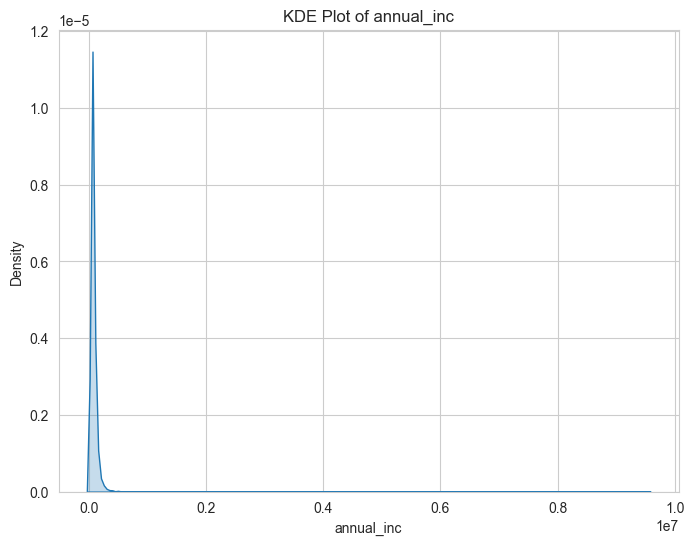

In [78]:
plot_kde(fintech_df_2, 'annual_inc')

##### Boxplots

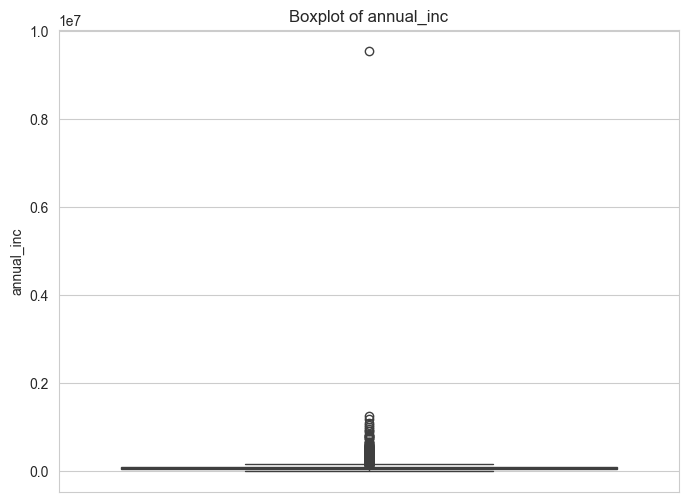

In [79]:
plot_boxplot(fintech_df_2, 'annual_inc')

In [80]:
annual_inc_iqr_oultlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'annual_inc')

In [81]:
annual_inc_iqr_oultlier_mask.sum()

1330

In [82]:
fintech_df_2 = log_transform_col(fintech_df_2, 'annual_inc')

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


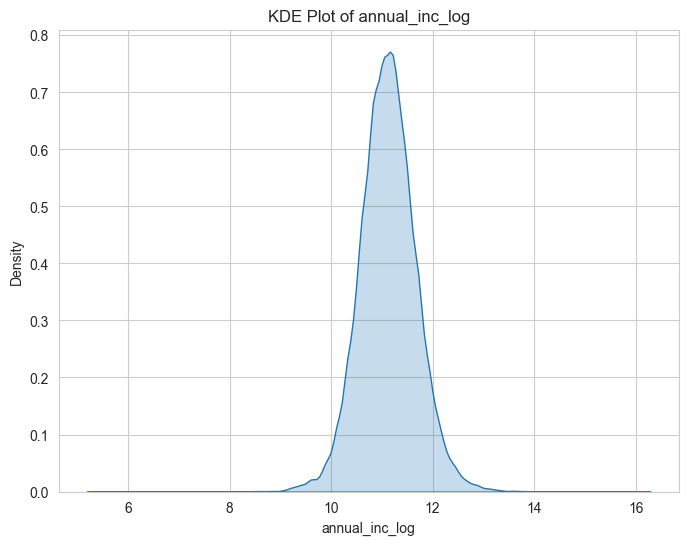

In [83]:
plot_kde(fintech_df_2, 'annual_inc_log')

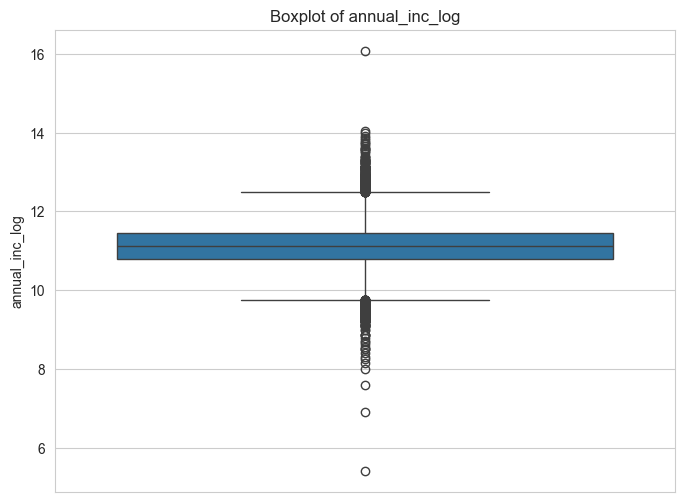

In [84]:
plot_boxplot(fintech_df_2, 'annual_inc_log')

In [85]:
annual_inc_log_iqr_outliers_mask, _, _ = calculate_whiskers(fintech_df_2, 'annual_inc_log')

In [86]:
print(f'Percentage of outliers: {annual_inc_log_iqr_outliers_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {annual_inc_log_iqr_outliers_mask.sum()}')

Percentage of outliers: 2.0569737328893822
Number of outliers: 556


we can leave outliers as is as they are still numbers which could exist as annual_inc and there are only 556 outliers now (2.06%)

### annual_inc_joint

In [87]:
fintech_df_2['annual_inc_joint'].nunique()

637

In [88]:
fintech_df_2['annual_inc_joint'].isna().sum()

25170

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


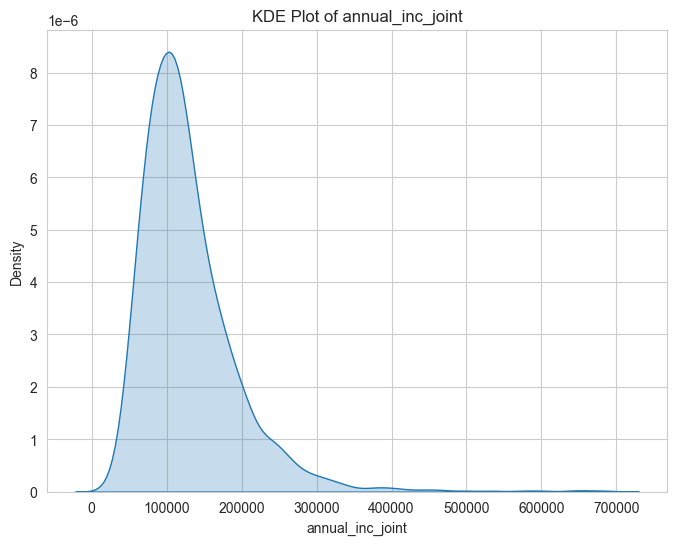

In [89]:
plot_kde(fintech_df_2, 'annual_inc_joint')

#### Outliers

##### Boxplots

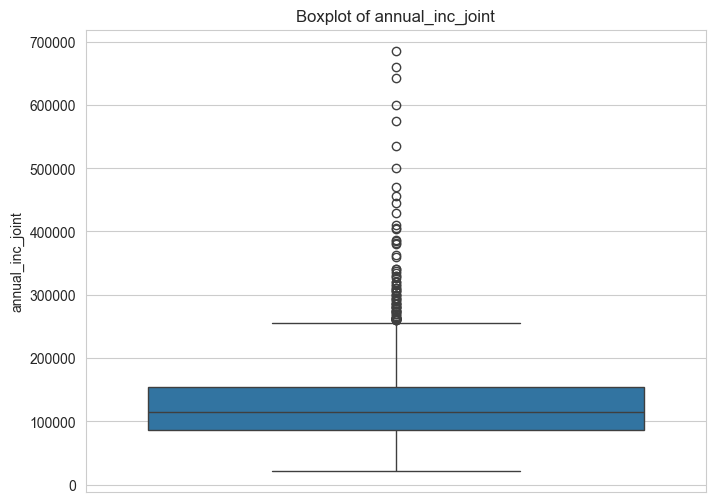

In [90]:
plot_boxplot(fintech_df_2, 'annual_inc_joint')

In [91]:
annual_inc_joint_iqr_outliers_mask, annual_inc_joint_lower_whisker, annual_inc_joint_upper_whisker = calculate_whiskers(fintech_df_2, 'annual_inc_joint')

In [92]:
fintech_df_2[annual_inc_joint_iqr_outliers_mask].shape[0]

75

as you can see there are some outliers according to the boxplot

In [93]:
fintech_df_2 = log_transform_col(fintech_df_2, 'annual_inc_joint')

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


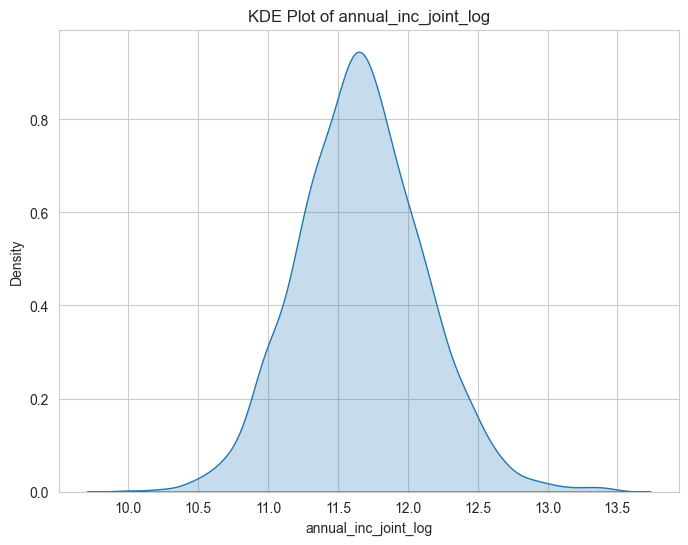

In [94]:
plot_kde(fintech_df_2, 'annual_inc_joint_log')

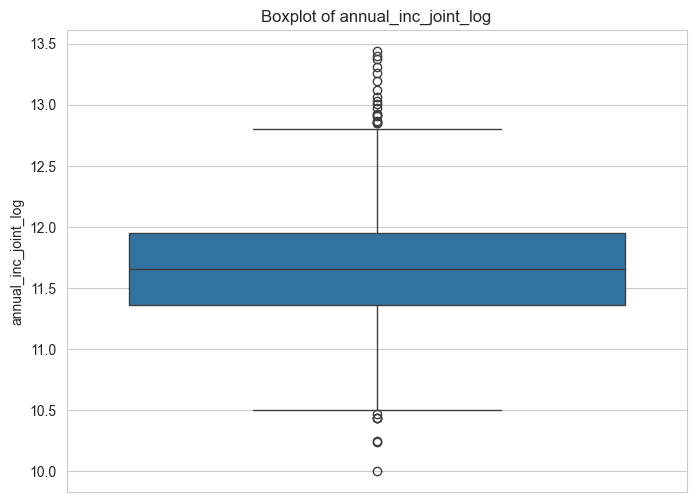

In [95]:
plot_boxplot(fintech_df_2, 'annual_inc_joint_log')

In [96]:
annual_inc_joint_log_iqr_outliers_mask, annual_inc_joint_log_lower_whisker, annual_inc_joint_log_upper_whisker = calculate_whiskers(fintech_df_2, 'annual_inc_joint_log')

In [97]:
print(f'Percentage of outliers: {annual_inc_joint_log_iqr_outliers_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {annual_inc_joint_log_iqr_outliers_mask.sum()}')

Percentage of outliers: 0.0924898261191269
Number of outliers: 25


we can leave outliers as is as they are still numbers which could exist as annual_income_joint and there are only 25 outliers now (0.09%)

#### Impute

In [98]:
annual_inc_joint_na_mask = fintech_df_2['annual_inc_joint_log'].isna()
fintech_df_2[annual_inc_joint_na_mask]['type'].unique()

array(['INDIVIDUAL', 'Individual', 'DIRECT_PAY'], dtype=object)

The NaN values in the `annual_inc_joint` column aren’t truly missing but instead represent cases where joint income doesn't apply because the loan type isn’t `Joint`. I filled these values with 0 to clearly indicate that joint income is not relevant for these customers.

In [99]:
def impute_annual_inc_joint(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    orig_col_name = get_orig_col_name(col_name)
    df[f'{orig_col_name}_imputed'] = df[col_name].fillna(0)
    return df

In [100]:
fintech_df_2 = impute_annual_inc_joint(fintech_df_2, 'annual_inc_joint_log')

In [101]:
fintech_df_2['annual_inc_joint_imputed'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


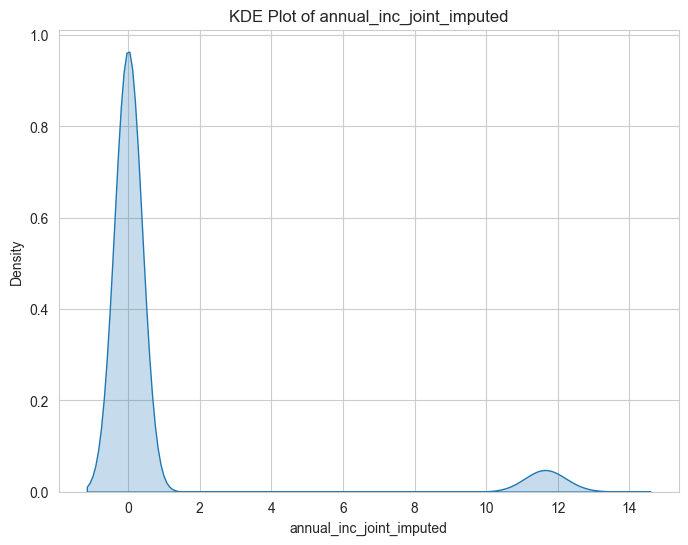

In [102]:
plot_kde(fintech_df_2, 'annual_inc_joint_imputed')

### verification_status

In [103]:
fintech_df_2['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [104]:
fintech_df_2['verification_status'].isna().sum()

0

#### Encode

I chose to one-hot encode the verification_status column because the values ("Source Verified," "Verified," "Not Verified") are nominal categories without any ordinal relationship. One-hot encoding ensures that the model (if one used later) treats each verification status as a distinct and independent category. If I used label encoding, it would assign numerical values to these categories, potentially implying an order or ranking (e.g., treating "Source Verified" as greater than "Verified"), which could mislead the model (if one used later).

In [105]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'verification_status')

In [106]:
fintech_df_2['verification_status_Not Verified'].unique(), fintech_df_2['verification_status_Source Verified'].unique(), fintech_df_2['verification_status_Verified'].unique() 

(array([0, 1]), array([1, 0]), array([0, 1]))

In [107]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY
5,verification_status,Source Verified,verification_status_Source Verified
6,verification_status,Verified,verification_status_Verified
7,verification_status,Not Verified,verification_status_Not Verified


### zip_code

In [108]:
fintech_df_2['zip_code'].unique()

array(['333xx', '237xx', '111xx', '070xx', '750xx', '762xx', '452xx',
       '125xx', '082xx', '105xx', '342xx', '786xx', '337xx', '372xx',
       '357xx', '925xx', '989xx', '331xx', '770xx', '852xx', '113xx',
       '284xx', '926xx', '741xx', '064xx', '327xx', '027xx', '761xx',
       '744xx', '484xx', '623xx', '480xx', '841xx', '216xx', '038xx',
       '600xx', '085xx', '294xx', '117xx', '120xx', '973xx', '060xx',
       '182xx', '145xx', '322xx', '278xx', '928xx', '844xx', '151xx',
       '787xx', '605xx', '797xx', '908xx', '606xx', '303xx', '920xx',
       '907xx', '930xx', '546xx', '302xx', '161xx', '550xx', '330xx',
       '363xx', '633xx', '321xx', '351xx', '464xx', '148xx', '021xx',
       '207xx', '104xx', '939xx', '201xx', '785xx', '286xx', '473xx',
       '271xx', '209xx', '384xx', '753xx', '951xx', '087xx', '756xx',
       '956xx', '483xx', '490xx', '225xx', '292xx', '672xx', '958xx',
       '301xx', '193xx', '276xx', '890xx', '328xx', '300xx', '846xx',
       '325xx', '662

In [109]:
fintech_df_2['zip_code'].isna().sum()

0

### addr_state

In [110]:
(fintech_df_2['state'] == fintech_df_2['addr_state']).all()

True

In [111]:
fintech_df_2['addr_state'].isna().sum()

0

#### Encode

I chose label encoding for the `addr_state` column to impose an alphabetical order on the states. By assigning integer labels based on lexicographical order, I provide a consistent, ordered representation without inflating dimensionality because using one-hot encoding would have significantly increased dimensionality, adding around 50 additional columns, one for each state. This would increase both memory usage and computational load, which may not be practical or necessary for this feature.

In [112]:
fintech_df_2 = encode_col(fintech_df_2, 'label', 'addr_state', need_to_sort=True)

In [113]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY
5,verification_status,Source Verified,verification_status_Source Verified
6,verification_status,Verified,verification_status_Verified
7,verification_status,Not Verified,verification_status_Not Verified
8,addr_state,AK,0
9,addr_state,AL,1


### avg_cur_bal

In [114]:
fintech_df_2['avg_cur_bal'].unique()

array([ 8275., 25385.,   282., ..., 24701.,  8393., 13313.])

In [115]:
fintech_df_2['avg_cur_bal'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


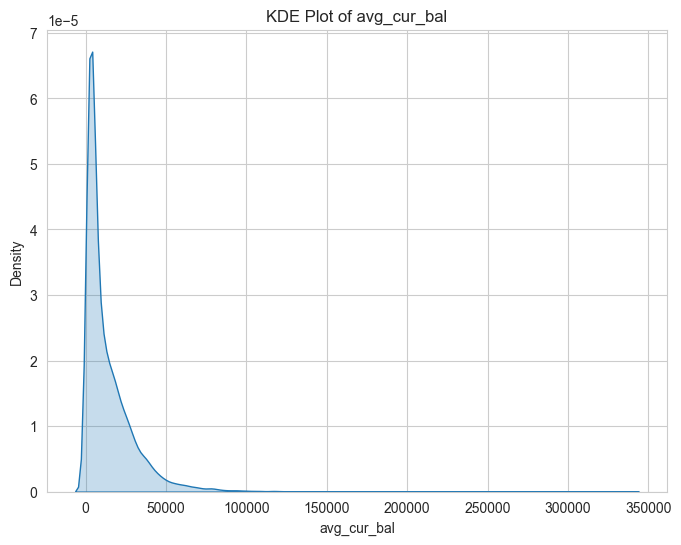

In [116]:
plot_kde(fintech_df_2, 'avg_cur_bal')

##### Boxplots

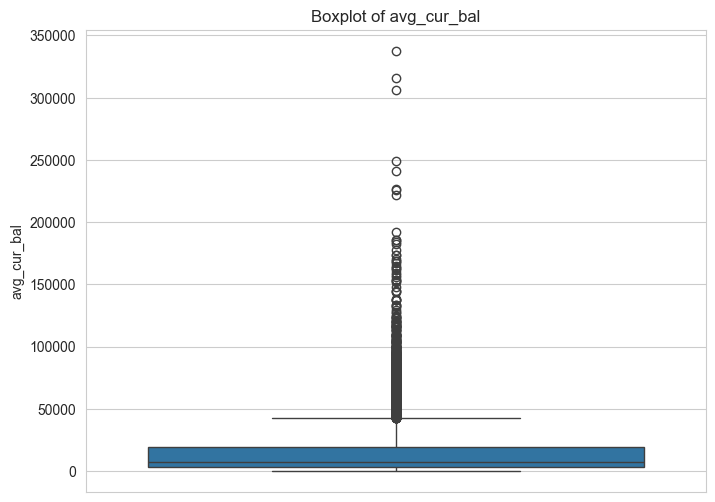

In [117]:
plot_boxplot(fintech_df_2, 'avg_cur_bal')

In [118]:
avg_cur_bal_iqr_outlier_mask, avg_cur_bal_lower_whisker, avg_cur_bal_upper_whisker = calculate_whiskers(fintech_df_2, 'avg_cur_bal')

In [119]:
avg_cur_bal_iqr_outlier_mask.sum()

1402

lets log the avg_cur_bal column to unskew the attribute to make it closer to normal distribution and decrease number of outliers

In [120]:
fintech_df_2 = log_transform_col(fintech_df_2, 'avg_cur_bal')

In [121]:
fintech_df_2['avg_cur_bal_log1p'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


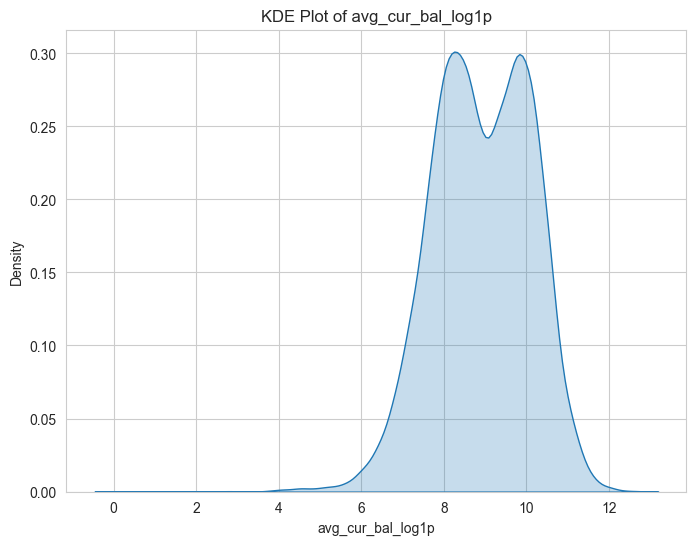

In [122]:
plot_kde(fintech_df_2, 'avg_cur_bal_log1p')

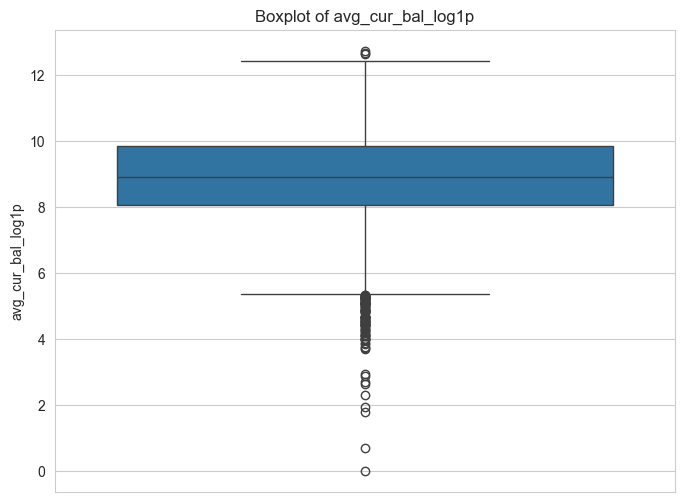

In [123]:
plot_boxplot(fintech_df_2, 'avg_cur_bal_log1p')

In [124]:
avg_cur_bal_log_iqr_outlier_mask, avg_cur_bal_log_lower_whisker, avg_cur_bal_log_upper_whisker = calculate_whiskers(fintech_df_2, 'avg_cur_bal_log1p')

In [125]:
avg_cur_bal_log_iqr_outlier_mask.sum()

103

In [126]:
print(f'Percentage of outliers: {avg_cur_bal_log_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {avg_cur_bal_log_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.3810580836108028
Number of outliers: 103


We could remove the outliers as they only constitute 0.38% of the df but I will chose to leave it as the values could occur in real life

lets try sqrt

In [127]:
fintech_df_2 = sqrt_transform_col(fintech_df_2, 'avg_cur_bal')

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


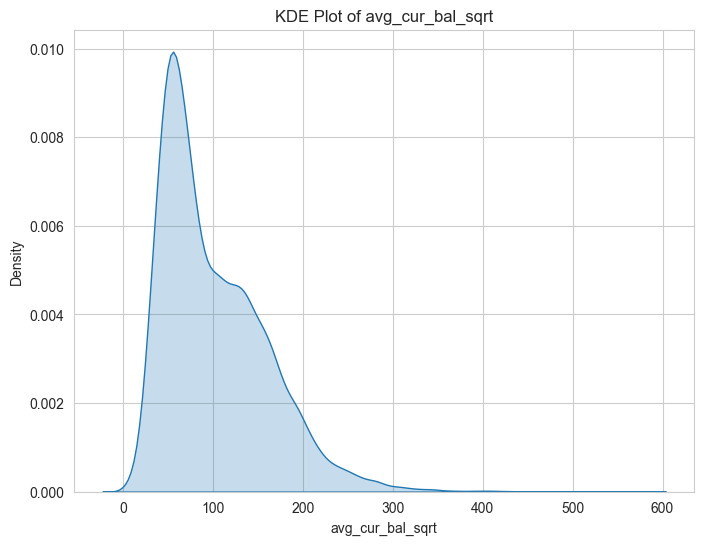

In [128]:
plot_kde(fintech_df_2, 'avg_cur_bal_sqrt')

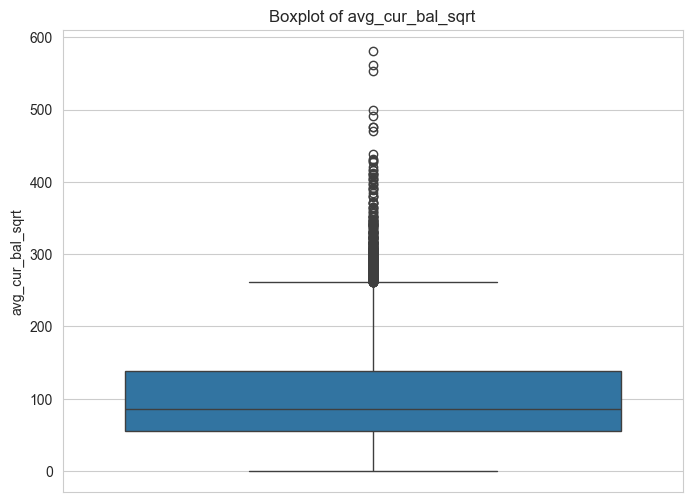

In [129]:
plot_boxplot(fintech_df_2, 'avg_cur_bal_sqrt')

In [130]:
avg_cur_bal_sqrt_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'avg_cur_bal_sqrt')

In [131]:
print(f'Percentage of outliers: {avg_cur_bal_sqrt_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {avg_cur_bal_sqrt_iqr_outlier_mask.sum()}')

Percentage of outliers: 1.4428412874583796
Number of outliers: 390


lets try box-cox

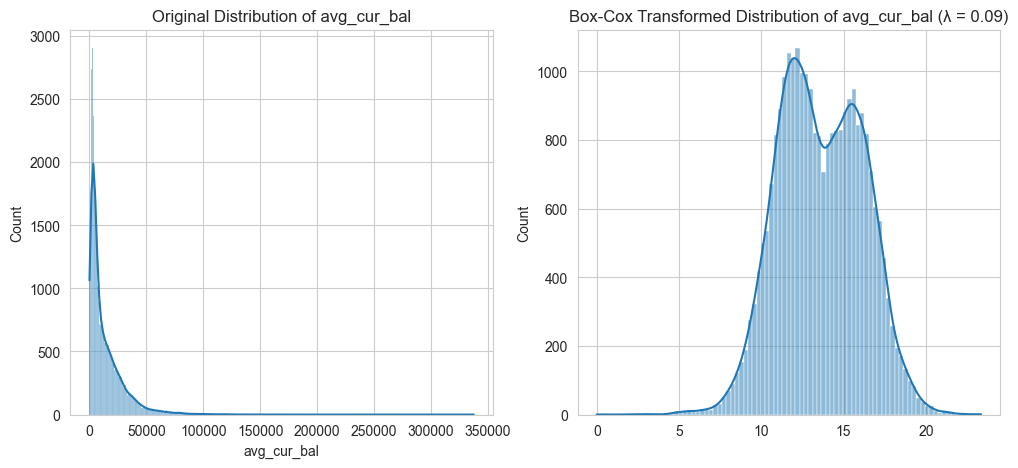

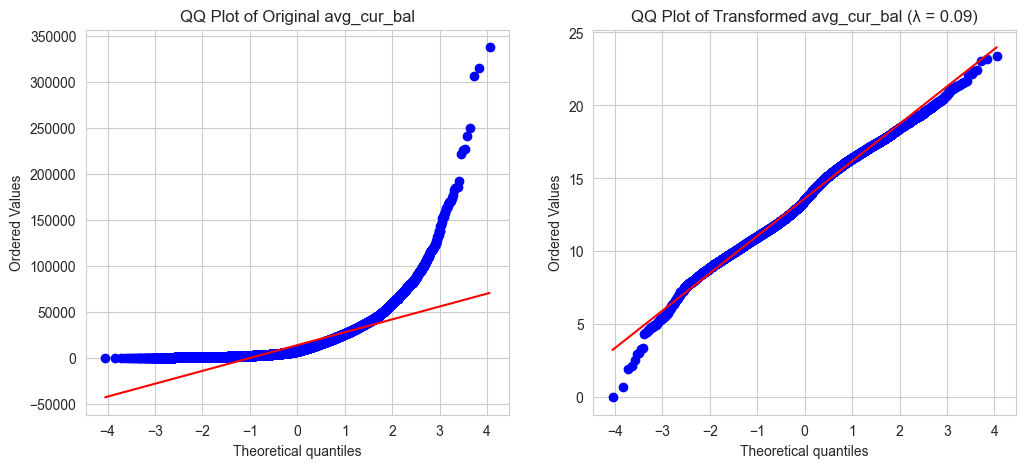

In [132]:
fintech_df_2, avg_cur_bal_boxcox_lambda = apply_boxcox(fintech_df_2, 'avg_cur_bal')

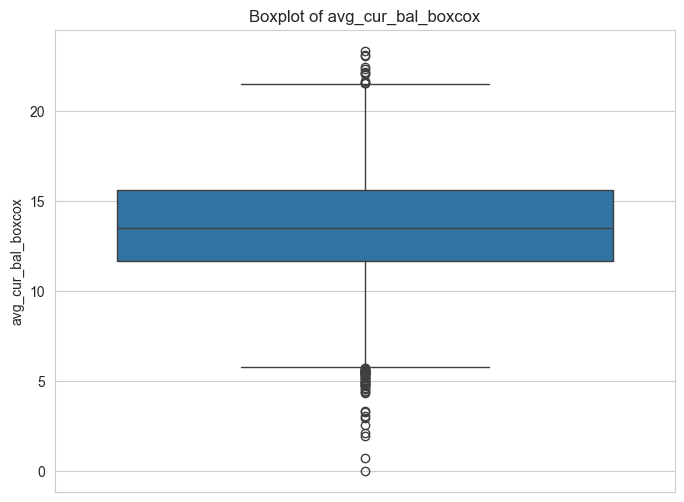

In [133]:
plot_boxplot(fintech_df_2, 'avg_cur_bal_boxcox')

In [134]:
avg_cur_bal_boxcox_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'avg_cur_bal_boxcox')

In [135]:
print(f'Percentage of outliers: {avg_cur_bal_boxcox_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {avg_cur_bal_boxcox_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.2256751757306696
Number of outliers: 61


As seen here boxcox with lambda = 0.16 resulted in most decrease in outliers; therefore, it is the new tranformed column we will adopt from now on. We could remove the outliers as they only constitute 0.23% of the df but I will chose to leave it as the values could occur in real life

### tot_cur_bal

In [136]:
fintech_df_2['tot_cur_bal'].unique()

array([239986., 279232.,   1691., ...,  58754.,  22390., 133129.])

In [137]:
fintech_df_2['tot_cur_bal'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


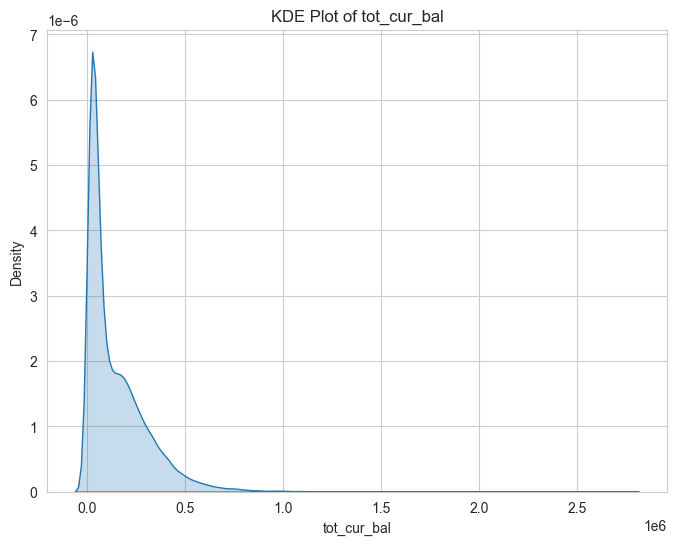

In [138]:
plot_kde(fintech_df_2, 'tot_cur_bal')

##### Boxplots

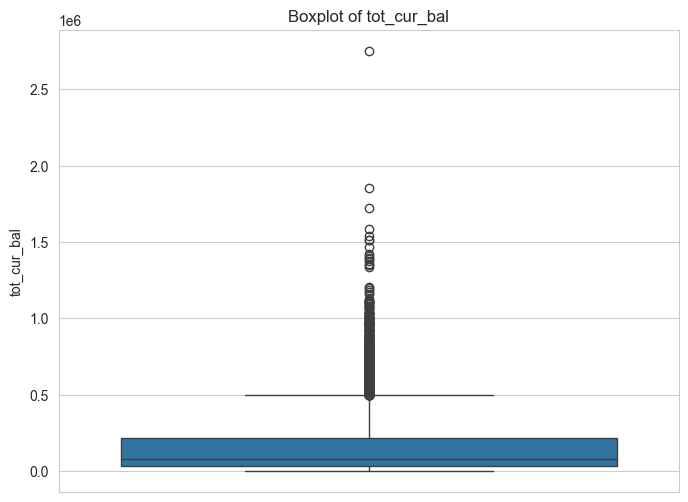

In [139]:
plot_boxplot(fintech_df_2, 'tot_cur_bal')

In [140]:
tot_cur_bal_iqr_outlier_mask, tot_cur_bal_lower_whisker, tot_cur_bal_upper_whisker = calculate_whiskers(fintech_df_2, 'tot_cur_bal')

In [141]:
tot_cur_bal_iqr_outlier_mask.sum()

946

lets log the tot_cur_bal column to unskew the attribute to make it closer to normal distribution and decrease number of outliers

In [142]:
fintech_df_2 = log_transform_col(fintech_df_2, 'tot_cur_bal')

In [143]:
fintech_df_2['tot_cur_bal_log'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


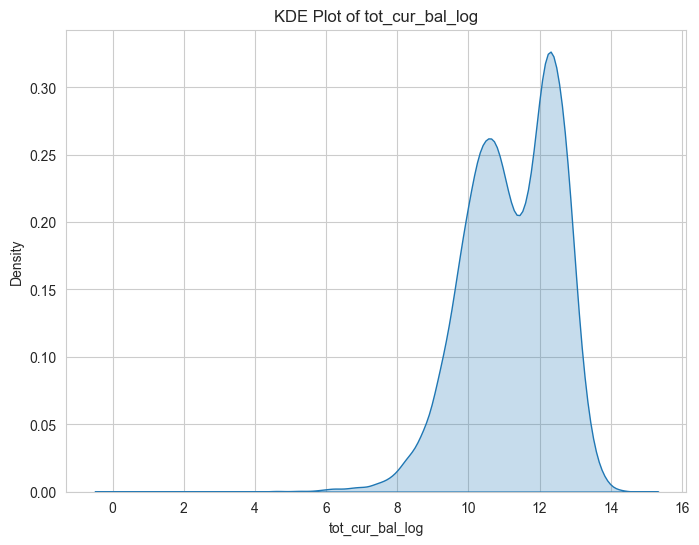

In [144]:
plot_kde(fintech_df_2, 'tot_cur_bal_log')

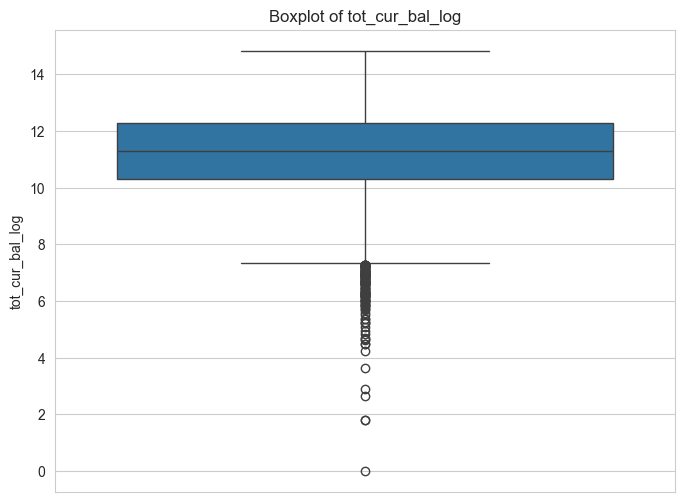

In [145]:
plot_boxplot(fintech_df_2, 'tot_cur_bal_log')

In [146]:
tot_cur_bal_log_iqr_outlier_mask, tot_cur_bal_log_lower_whisker, tot_cur_bal_log_upper_whisker = calculate_whiskers(fintech_df_2, 'tot_cur_bal_log')

In [147]:
tot_cur_bal_log_iqr_outlier_mask.sum()

131

In [148]:
print(f'Percentage of outliers: {tot_cur_bal_log_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {tot_cur_bal_log_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.4846466888642249
Number of outliers: 131


lets try sqrt

In [149]:
fintech_df_2 = sqrt_transform_col(fintech_df_2, 'tot_cur_bal')

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


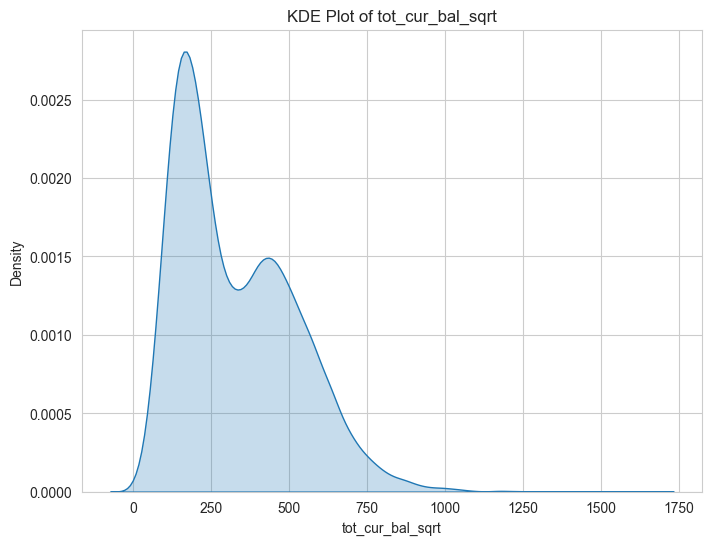

In [150]:
plot_kde(fintech_df_2, 'tot_cur_bal_sqrt')

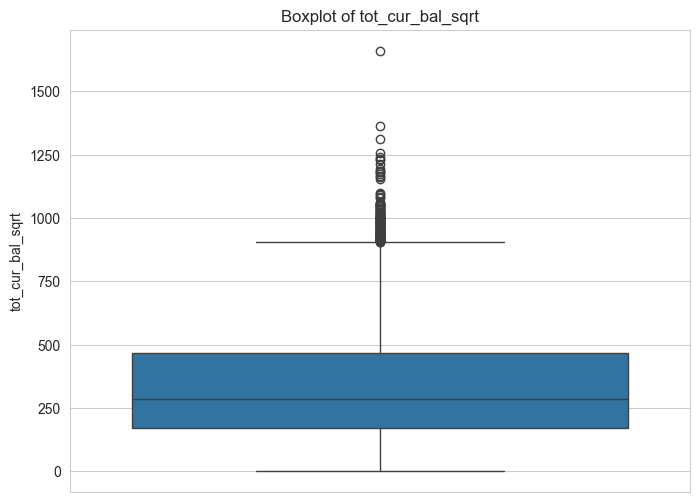

In [151]:
plot_boxplot(fintech_df_2, 'tot_cur_bal_sqrt')

In [152]:
tot_cur_bal_sqrt_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'tot_cur_bal_sqrt')

In [153]:
print(f'Percentage of outliers: {tot_cur_bal_sqrt_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {tot_cur_bal_sqrt_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.4698483166851646
Number of outliers: 127


lets try box-cox

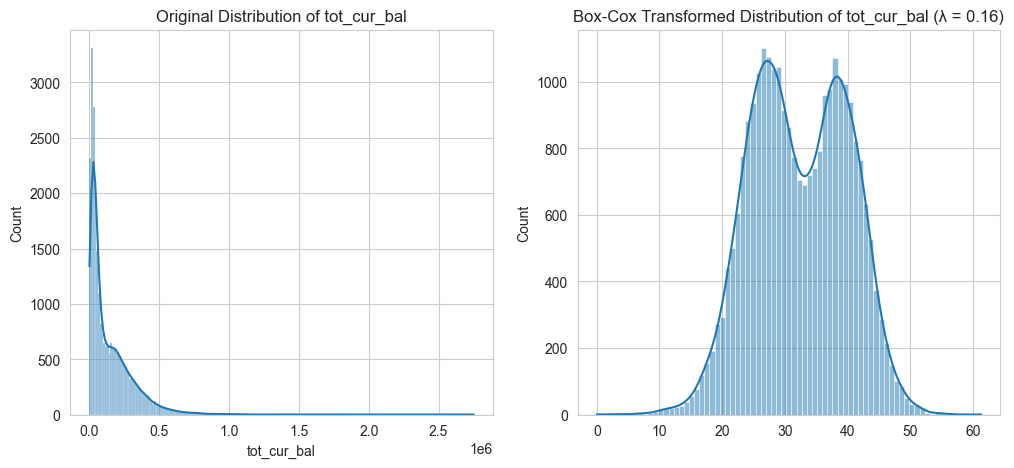

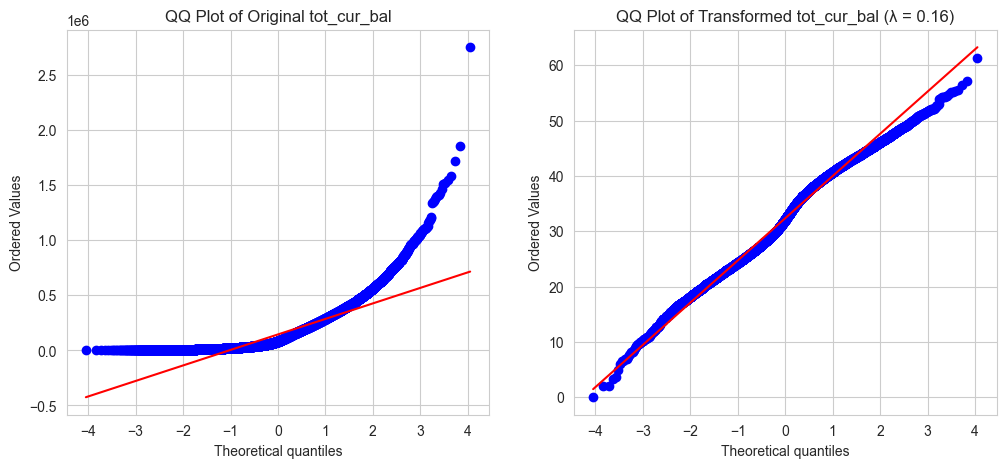

In [154]:
fintech_df_2, avg_cur_bal_boxcox_lambda = apply_boxcox(fintech_df_2, 'tot_cur_bal')

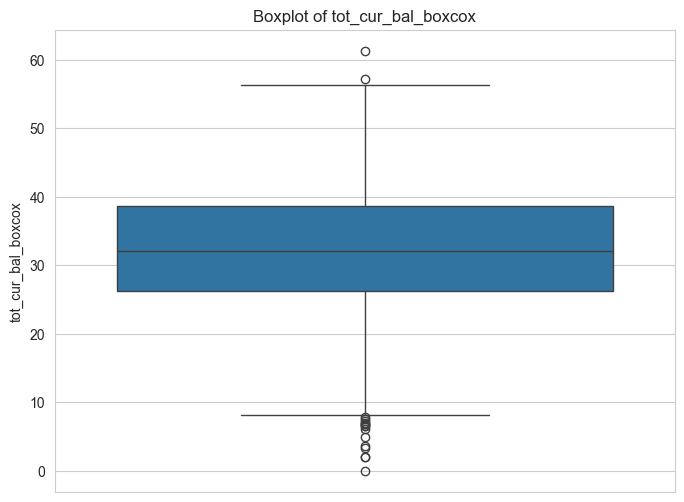

In [155]:
plot_boxplot(fintech_df_2, 'tot_cur_bal_boxcox')

In [156]:
tot_cur_bal_boxcox_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'tot_cur_bal_boxcox')

In [157]:
print(f'Percentage of outliers: {tot_cur_bal_boxcox_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {tot_cur_bal_boxcox_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.06289308176100629
Number of outliers: 17


As seen here boxcox with lambda = 0.16 resulted in most decrease in outliers; therefore, it is the new tranformed column we will adopt from now on. We could remove the outliers as they only constitute 0.06% of the df but I will chose to leave it as the values could occur in real life

### loan_id

In [158]:
fintech_df_2['loan_id'].unique()

array([ 39474, 158200, 113752, ..., 132651,  15314,   5616], dtype=int64)

In [159]:
fintech_df_2['loan_id'].isna().sum()

0

### loan_status

In [160]:
fintech_df_2['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [161]:
fintech_df_2['loan_status'].isna().sum()

0

#### Encode

I chose one-hot encoding for the `loan_status` column because, although there may be a general order of severity in loan statuses, it’s not clear exactly how to order categories like "Default" and "Charged Off." One-hot encoding treats each status as separate and avoids any assumptions about order, ensuring the model doesn’t misinterpret the relationships between these categories. This way, each loan status keeps its unique meaning without implying a specific progression.

In [162]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'loan_status')

In [163]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY
...,...,...,...
60,loan_status,Charged Off,loan_status_Charged Off
61,loan_status,In Grace Period,loan_status_In Grace Period
62,loan_status,Late (31-120 days),loan_status_Late (31-120 days)
63,loan_status,Late (16-30 days),loan_status_Late (16-30 days)


### loan_amount

In [164]:
fintech_df_2['loan_amount'].unique()

array([ 6000., 15000., 11500., ..., 39600., 29475.,  1675.])

In [165]:
fintech_df_2['loan_amount'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


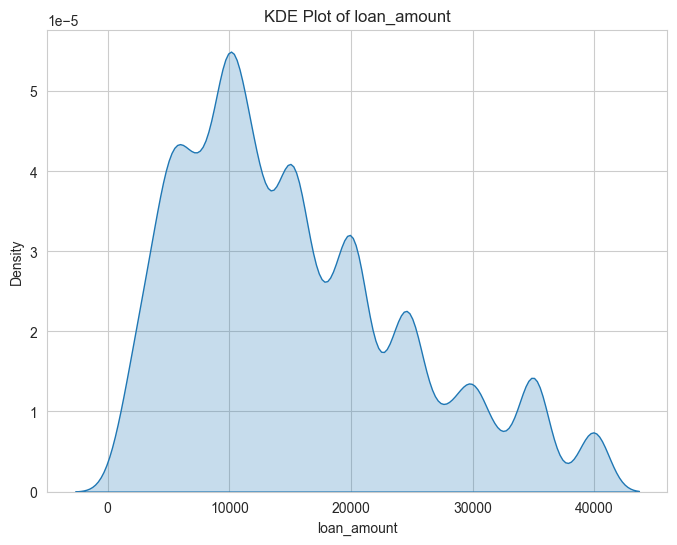

In [166]:
plot_kde(fintech_df_2, 'loan_amount')

##### Boxplots

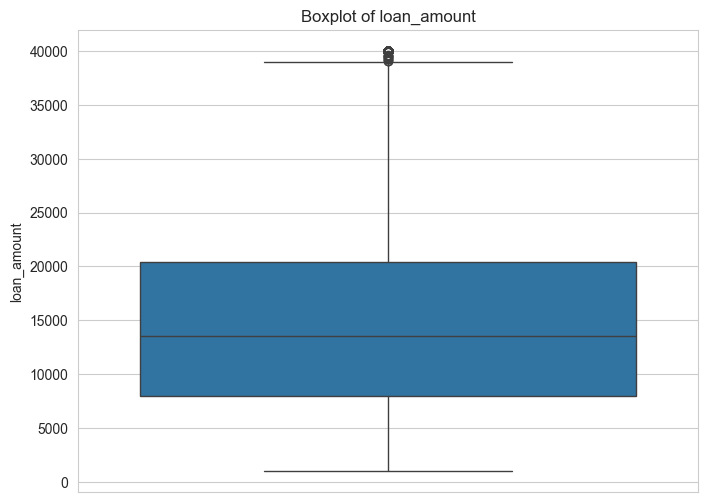

In [167]:
plot_boxplot(fintech_df_2, 'loan_amount')

In [168]:
loan_amount_iqr_outlier_mask, loan_amount_lower_whisker, loan_amount_upper_whisker = calculate_whiskers(fintech_df_2, 'loan_amount')

In [169]:
loan_amount_iqr_outlier_mask.sum()

592

lets log the loan_amount column to unskew the attribute to make it closer to normal distribution and decrease number of outliers

In [170]:
fintech_df_2 = log_transform_col(fintech_df_2, 'loan_amount')

In [171]:
fintech_df_2['loan_amount_log'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


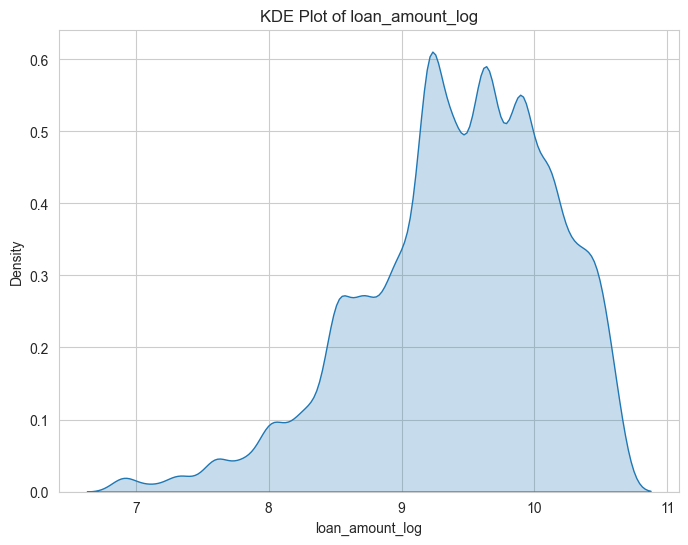

In [172]:
plot_kde(fintech_df_2, 'loan_amount_log')

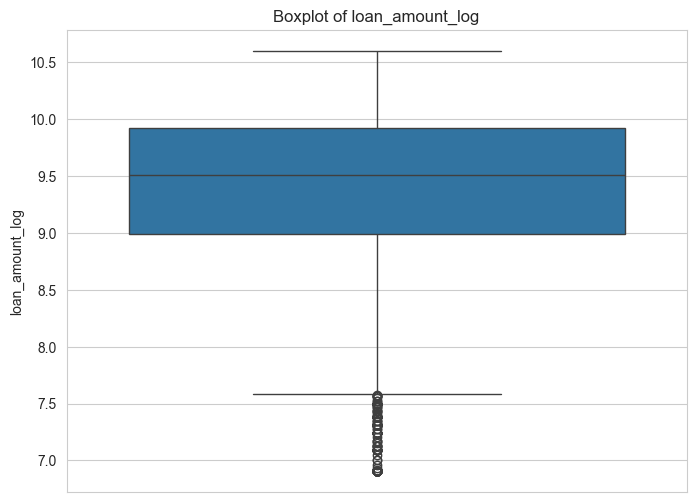

In [173]:
plot_boxplot(fintech_df_2, 'loan_amount_log')

In [174]:
loan_amount_log_iqr_outlier_mask, loan_amount_log_lower_whisker, loan_amount_log_upper_whisker = calculate_whiskers(fintech_df_2, 'loan_amount_log')

In [175]:
loan_amount_log_iqr_outlier_mask.sum()

340

In [176]:
print(f'Percentage of outliers: {loan_amount_log_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {loan_amount_log_iqr_outlier_mask.sum()}')

Percentage of outliers: 1.257861635220126
Number of outliers: 340


lets try Sqrt

In [177]:
fintech_df_2 = sqrt_transform_col(fintech_df_2, 'loan_amount')

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


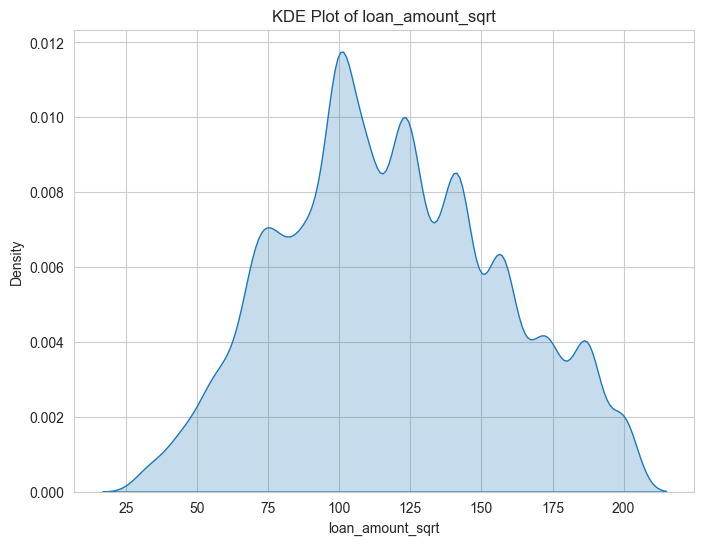

In [178]:
plot_kde(fintech_df_2, 'loan_amount_sqrt')

funded_amount is more normally distributed after using sqrt

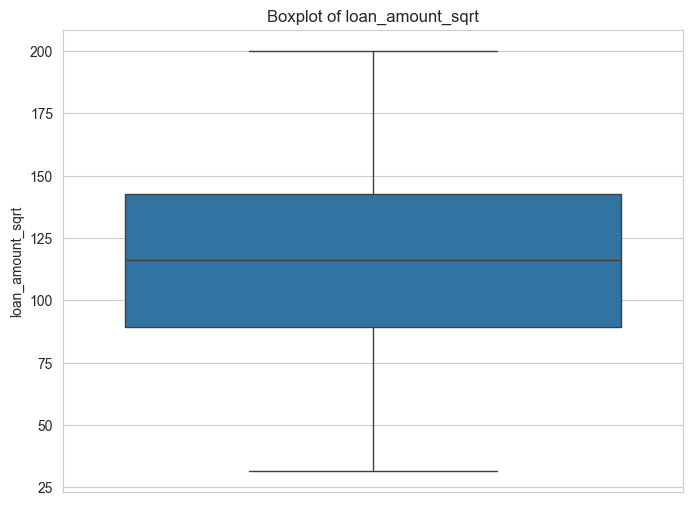

In [179]:
plot_boxplot(fintech_df_2, 'loan_amount_sqrt')

In [180]:
loan_amount_sqrt_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'loan_amount_sqrt')

In [181]:
print(f'Percentage of outliers: {loan_amount_sqrt_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {loan_amount_sqrt_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.0
Number of outliers: 0


##### Z-Score

C:\Users\001\AppData\Local\Temp\ipykernel_9248\1607823687.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(z_score, shade=True)


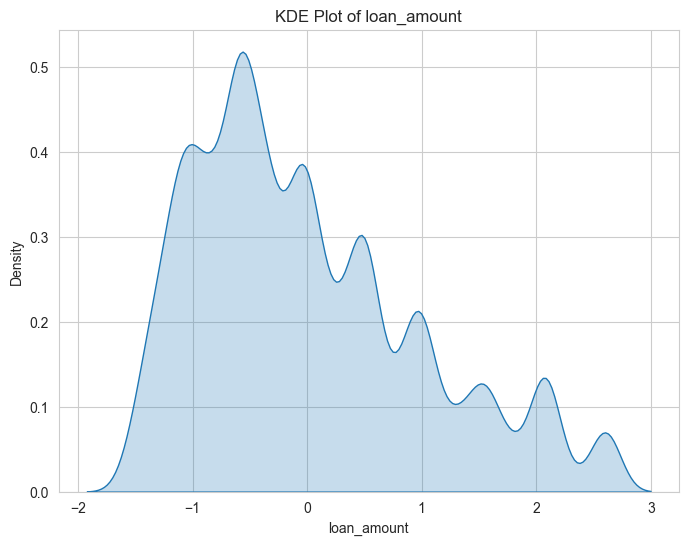

In [182]:
loan_amount_z_score = plot_z_score(fintech_df_2, 'loan_amount')

In [183]:
loan_amount_outlier_mask = loan_amount_z_score[loan_amount_z_score.abs()>3]

In [184]:
len(loan_amount_outlier_mask)

0

According to Z-score method, the loan_amount col has now outliers exceeding 3 standard deviations

### state

In [185]:
fintech_df_2['state'].unique()

array(['FL', 'VA', 'NY', 'NJ', 'TX', 'OH', 'TN', 'AL', 'CA', 'WA', 'AZ',
       'NC', 'OK', 'CT', 'MA', 'MI', 'IL', 'UT', 'MD', 'NH', 'SC', 'OR',
       'PA', 'GA', 'WI', 'MN', 'MO', 'IN', 'KS', 'NV', 'CO', 'RI', 'AR',
       'WV', 'NE', 'DE', 'MS', 'SD', 'MT', 'VT', 'LA', 'WY', 'KY', 'DC',
       'ME', 'NM', 'HI', 'AK', 'ND', 'ID'], dtype=object)

In [186]:
fintech_df_2['state'].isna().sum()

0

#### Encode

I chose label encoding for the `state` column to impose an alphabetical order on the states. By assigning integer labels based on lexicographical order, I provide a consistent, ordered representation without inflating dimensionality because using one-hot encoding would have significantly increased dimensionality, adding around 50 additional columns, one for each state. This would increase both memory usage and computational load, which may not be practical or necessary for this feature.

In [187]:
fintech_df_2 = encode_col(fintech_df_2, 'label', 'state', need_to_sort=True)

In [188]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY
...,...,...,...
110,state,VT,45
111,state,WA,46
112,state,WI,47
113,state,WV,48


### funded_amount

In [189]:
fintech_df_2['funded_amount'].unique()

array([ 6000., 15000., 11500., ..., 39600., 29475.,  1675.])

In [190]:
fintech_df_2['funded_amount'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


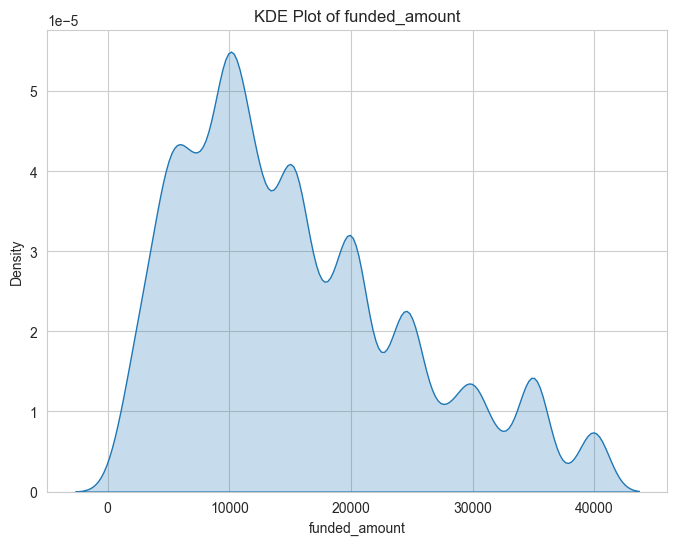

In [191]:
plot_kde(fintech_df_2, 'funded_amount')

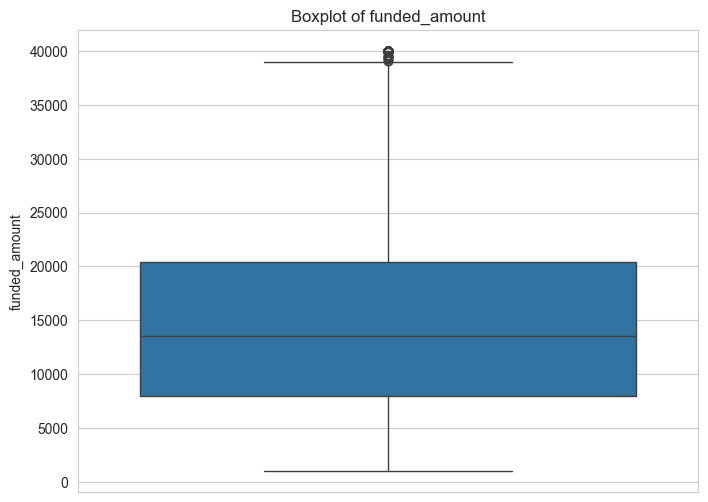

In [192]:
plot_boxplot(fintech_df_2, 'funded_amount')

In [193]:
funded_amount_iqr_outlier_mask, funded_amount_lower_whisker, funded_amount_upper_whisker = calculate_whiskers(fintech_df_2, 'funded_amount')

In [194]:
funded_amount_iqr_outlier_mask.sum()

592

lets log the funded_amount column to unskew the attribute to make it closer to normal distribution and decrease number of outliers

In [195]:
fintech_df_2 = log_transform_col(fintech_df_2, 'funded_amount')

In [196]:
fintech_df_2['funded_amount_log'].isna().sum()

0

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


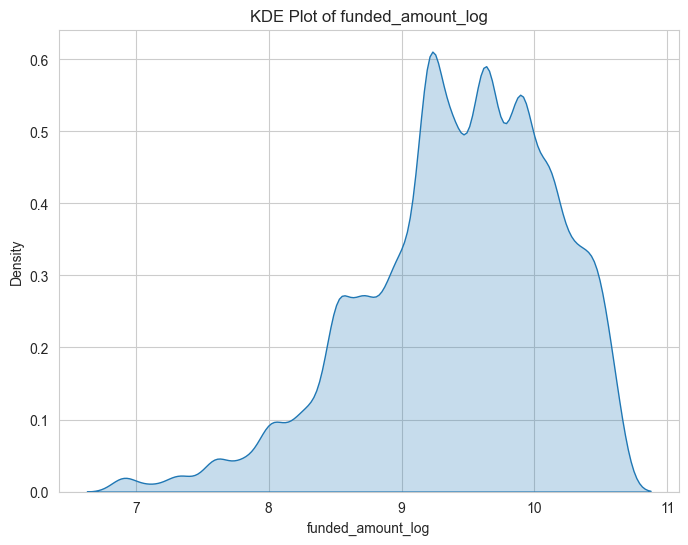

In [197]:
plot_kde(fintech_df_2, 'funded_amount_log')

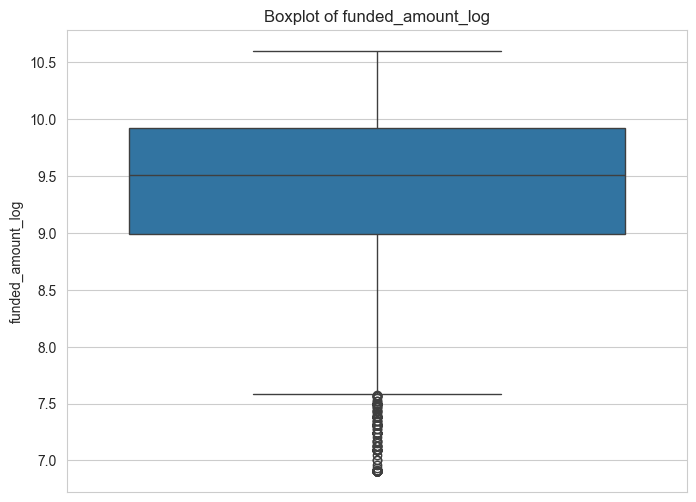

In [198]:
plot_boxplot(fintech_df_2, 'funded_amount_log')

In [199]:
funded_amount_log_iqr_outlier_mask, funded_amount_log_lower_whisker, funded_amount_log_upper_whisker = calculate_whiskers(fintech_df_2, 'funded_amount_log')

In [200]:
funded_amount_log_iqr_outlier_mask.sum()

340

In [201]:
print(f'Percentage of outliers: {funded_amount_log_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {funded_amount_log_iqr_outlier_mask.sum()}')

Percentage of outliers: 1.257861635220126
Number of outliers: 340


lets try Sqrt

In [202]:
fintech_df_2 = sqrt_transform_col(fintech_df_2, 'funded_amount')

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


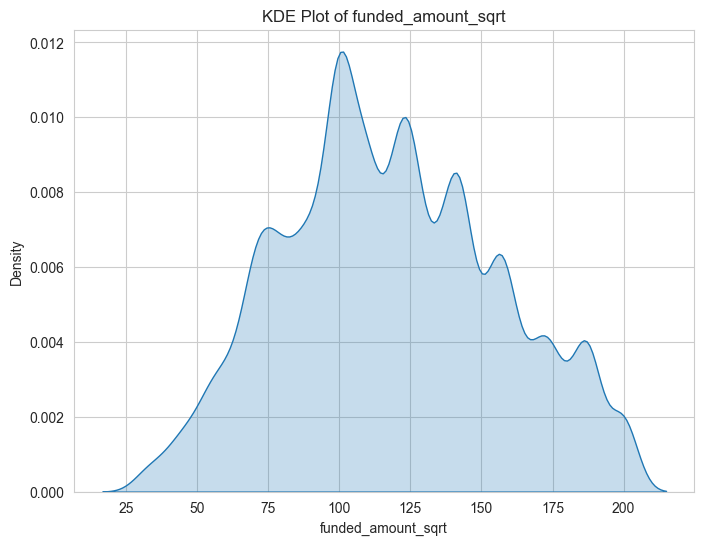

In [203]:
plot_kde(fintech_df_2, 'funded_amount_sqrt')

funded_amount is more normally distributed after using sqrt

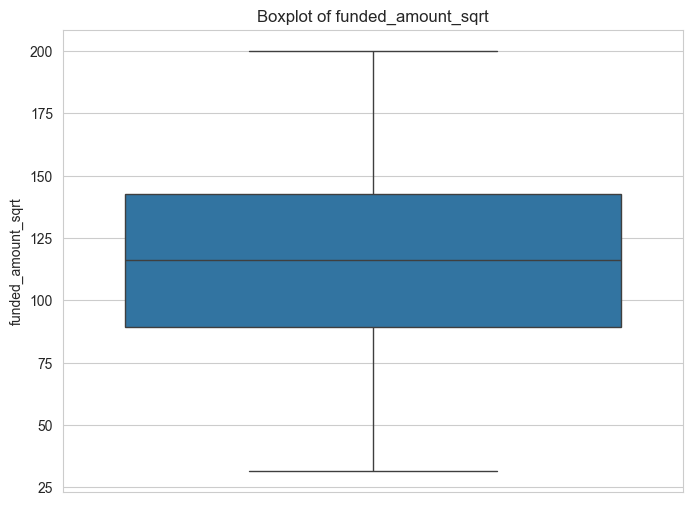

In [204]:
plot_boxplot(fintech_df_2, 'funded_amount_sqrt')

In [205]:
funded_amount_sqrt_iqr_outlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'funded_amount_sqrt')

In [206]:
print(f'Percentage of outliers: {funded_amount_sqrt_iqr_outlier_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {funded_amount_sqrt_iqr_outlier_mask.sum()}')

Percentage of outliers: 0.0
Number of outliers: 0


No outliers after transforming using sqrt

##### Z-Score

C:\Users\001\AppData\Local\Temp\ipykernel_9248\1607823687.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(z_score, shade=True)


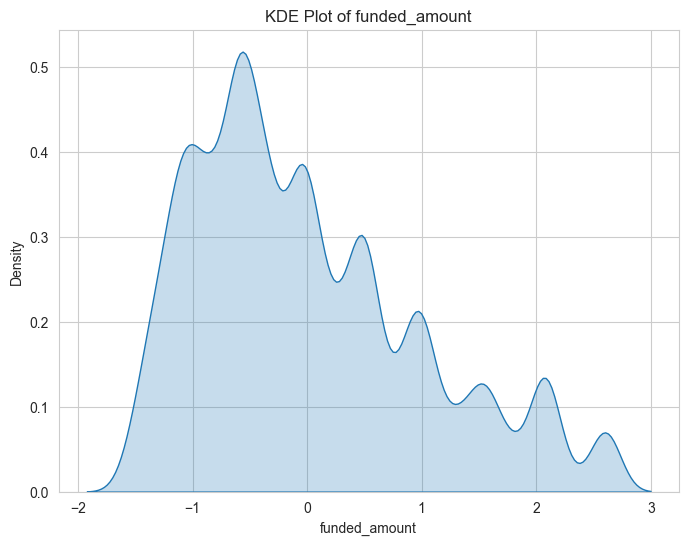

In [207]:
funded_amount_z_score = plot_z_score(fintech_df_2, 'funded_amount')

In [208]:
funded_amount_z_score = funded_amount_z_score[funded_amount_z_score.abs()>3]

In [209]:
len(funded_amount_z_score)

0

### term

In [210]:
fintech_df_2['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [211]:
fintech_df_2['term'].isna().sum()

0

In [212]:
def clean_term_col(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[f'{col_name}_cleaned'] = df[col_name].str.replace('months', '').str.strip()
    df[f'{col_name}_cleaned'] = df[f'{col_name}_cleaned'].astype(int)
    return df

In [213]:
fintech_df_2 = clean_term_col(fintech_df_2, 'term')

In [214]:
fintech_df_2['term_cleaned'].unique()

array([36, 60])

### int_rate

In [215]:
fintech_df_2['int_rate'].unique()

array([0.0649, 0.1806, 0.1114, 0.2149, 0.1171, 0.1899, 0.0967, 0.1499,
       0.0692, 0.0799, 0.288 , 0.1288, 0.1299, 0.1747, 0.1042, 0.0624,
       0.1335, 0.1367, 0.0867, 0.1333, 0.234 , 0.1561, 0.0721, 0.1199,
       0.1356, 0.1757, 0.0532, 0.0707, 0.0944, 0.0619, 0.0759, 0.1399,
       0.1505, 0.1153, 0.1407, 0.1091, 0.1557, 0.1524, 0.0916, 0.0791,
       0.0646, 0.1408, 0.1398, 0.0917, 0.1072, 0.1262, 0.1774,    nan,
       0.1905, 0.1709, 0.143 , 0.124 , 0.164 , 0.1894, 0.1691, 0.1259,
       0.0846, 0.1149, 0.1629, 0.0839, 0.1274, 0.1099, 0.1797, 0.0824,
       0.0881, 0.0789, 0.0689, 0.2779, 0.0818, 0.118 , 0.1273, 0.1504,
       0.1854, 0.0699, 0.0746, 0.089 , 0.0999, 0.1588, 0.1599, 0.0819,
       0.0899, 0.0531, 0.2055, 0.0702, 0.1144, 0.1239, 0.2399, 0.1646,
       0.1903, 0.1999, 0.1269, 0.1952, 0.0667, 0.2534, 0.0762, 0.1308,
       0.0611, 0.2145, 0.0943, 0.1008, 0.1359, 0.227 , 0.2383, 0.1559,
       0.0993, 0.1016, 0.0726, 0.1047, 0.1845, 0.0756, 0.1825, 0.0797,
      

In [216]:
fintech_df_2['int_rate'].isna().sum()

1185

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


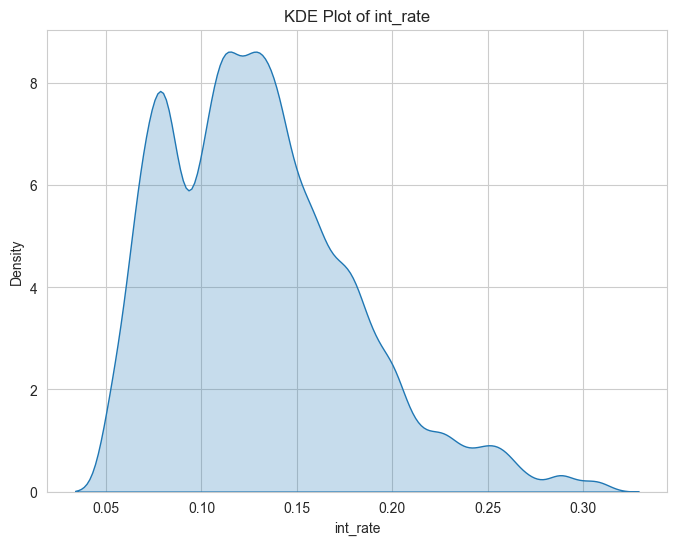

In [217]:
plot_kde(fintech_df_2, 'int_rate')

#### Outliers

##### Z-Score

C:\Users\001\AppData\Local\Temp\ipykernel_9248\1607823687.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(z_score, shade=True)


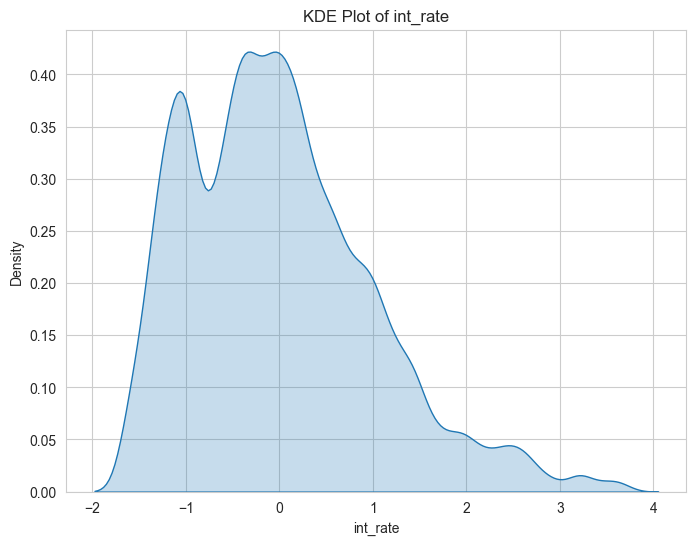

In [218]:
int_rate_z_score = plot_z_score(fintech_df_2, 'int_rate')

In [219]:
int_rate_outlier_mask = int_rate_z_score[int_rate_z_score.abs()>3]

In [220]:
len(int_rate_outlier_mask)

234

##### Boxplots

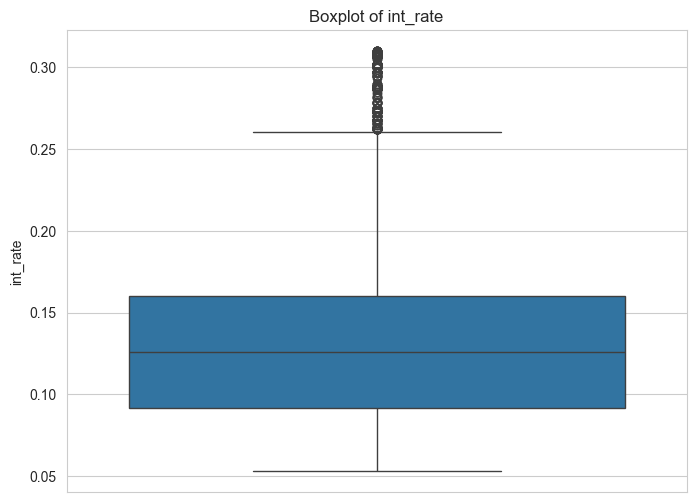

In [221]:
plot_boxplot(fintech_df_2, 'int_rate')

In [222]:
int_rate_iqr_oultlier_mask, _, _ = calculate_whiskers(fintech_df_2, 'int_rate')

In [223]:
int_rate_iqr_oultlier_mask.sum()

401

In [224]:
fintech_df_2 = log_transform_col(fintech_df_2, 'int_rate')

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


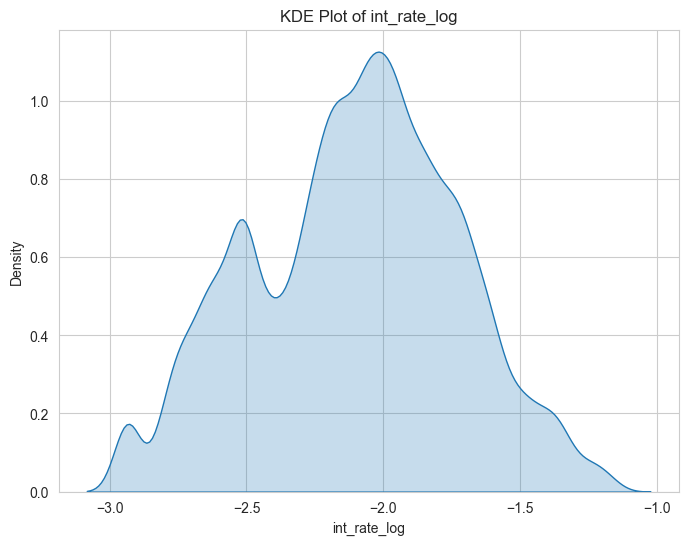

In [225]:
plot_kde(fintech_df_2, 'int_rate_log')

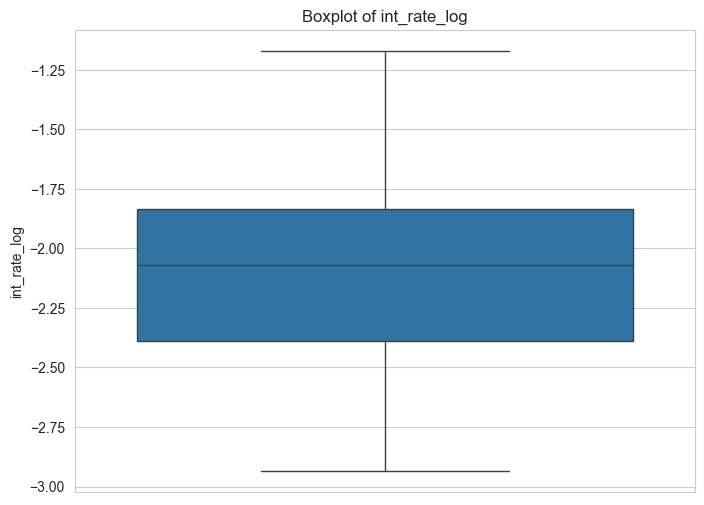

In [226]:
plot_boxplot(fintech_df_2, 'int_rate_log')

In [227]:
int_rate_log_iqr_outliers_mask, _, _ = calculate_whiskers(fintech_df_2, 'int_rate_log')

In [228]:
print(f'Percentage of outliers: {int_rate_log_iqr_outliers_mask.sum()/len(fintech_df_2) *100}')
print(f'Number of outliers: {int_rate_log_iqr_outliers_mask.sum()}')

Percentage of outliers: 0.0
Number of outliers: 0


#### Impute

The missing values in the int_rate column can be considered `Missing at Random (MAR)` because the likelihood of missing values is related to another observed variable (`grade`) as they both are highly correlated with a correlation of `0.92`. Since the missing interest rates are associated with specific grades, we can reasonably assume that the missingness is influenced by the grade of the loan, making it suitable to impute the missing values based on the average `int_rate` for each grade.

In [229]:
fintech_df_2.corr(numeric_only=True)

,annual_inc,annual_inc_joint,avg_cur_bal,tot_cur_bal,loan_id,loan_amount,funded_amount,int_rate,grade,pymnt_plan,emp_length_cleaned,annual_inc_bins,emp_length_imputed,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,annual_inc_log,annual_inc_joint_log,annual_inc_joint_imputed,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,addr_state_labelEncoded,avg_cur_bal_log1p,avg_cur_bal_sqrt,avg_cur_bal_boxcox,tot_cur_bal_log,tot_cur_bal_sqrt,tot_cur_bal_boxcox,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),loan_amount_log,loan_amount_sqrt,state_labelEncoded,funded_amount_log,funded_amount_sqrt,term_cleaned,int_rate_log
annual_inc,1.000000,0.700633,0.251727,0.357572,0.254991,0.275219,0.275219,-0.071143,-0.075469,0.002800,0.061805,0.511757,0.031535,-0.007368,0.136903,-0.030696,-0.119789,0.631303,0.667555,-0.050448,-0.039096,0.051233,-0.014540,-0.007199,0.249529,0.264213,0.254514,0.284744,0.331003,0.303004,-0.027656,0.033484,0.026784,-0.019811,0.000387,-0.004411,-0.004102,0.242673,0.265257,-0.007199,0.242673,0.265257,0.054759,-0.081108
annual_inc_joint,0.700633,1.000000,0.348962,0.500142,0.349821,0.380804,0.380804,-0.080443,-0.101787,NaN,0.073745,0.593358,0.002509,NaN,0.176434,-0.074731,-0.144498,0.536400,0.931048,0.931048,0.053627,0.051878,-0.104785,0.014827,0.326122,0.365769,0.337739,0.373210,0.461399,0.409923,-0.048275,0.029707,NaN,0.015301,-0.046307,0.008672,-0.033795,0.343421,0.369871,0.014827,0.343421,0.369871,0.076095,-0.099591
avg_cur_bal,0.251727,0.348962,1.000000,0.814612,0.198628,0.216677,0.216677,-0.079620,-0.081578,-0.002675,0.076944,0.354791,0.055162,-0.012731,0.443332,-0.077024,-0.403263,0.374524,0.349359,0.080672,-0.027071,-0.012696,0.044577,-0.011072,0.790099,0.943038,0.823846,0.680834,0.789479,0.728288,-0.047496,0.015183,-0.002648,0.010940,0.020521,-0.013763,-0.011778,0.186395,0.206661,-0.011072,0.186395,0.206661,0.071355,-0.087240
tot_cur_bal,0.357572,0.500142,0.814612,1.000000,0.283875,0.307601,0.307601,-0.085361,-0.087877,0.005278,0.106305,0.483734,0.074260,-0.014711,0.510994,-0.087620,-0.465560,0.514628,0.516622,0.073275,-0.039379,-0.009706,0.054904,-0.002825,0.778235,0.853575,0.800915,0.816162,0.958072,0.876550,-0.046983,0.030641,0.002911,-0.003618,0.010150,-0.016327,-0.012928,0.268219,0.294984,-0.002825,0.268219,0.294984,0.102511,-0.096536
loan_id,0.254991,0.349821,0.198628,0.283875,1.000000,0.962423,0.962423,0.084627,0.082212,0.006371,0.068709,0.438018,0.037821,-0.006123,0.177839,-0.033601,-0.159936,0.444684,0.408897,0.122847,-0.139611,0.026345,0.125731,0.011542,0.269461,0.243080,0.267183,0.321548,0.311158,0.322041,0.013396,0.066333,0.005186,-0.084801,0.016566,0.007228,0.009773,0.966726,0.988258,0.011542,0.966726,0.988258,0.460133,0.074815
loan_amount,0.275219,0.380804,0.216677,0.307601,0.962423,1.000000,1.000000,0.053682,0.053084,0.006989,0.065898,0.450545,0.037372,-0.006984,0.180757,-0.034525,-0.162262,0.455199,0.435445,0.135926,-0.152717,0.025511,0.141285,0.013726,0.274369,0.256746,0.273887,0.323750,0.326470,0.328925,0.004028,0.076960,0.005803,-0.089054,0.011845,0.004532,0.006352,0.921895,0.983685,0.013726,0.921895,0.983685,0.401253,0.043105
funded_amount,0.275219,0.380804,0.216677,0.307601,0.962423,1.000000,1.000000,0.053682,0.053084,0.006989,0.065898,0.450545,0.037372,-0.006984,0.180757,-0.034525,-0.162262,0.455199,0.435445,0.135926,-0.152717,0.025511,0.141285,0.013726,0.274369,0.256746,0.273887,0.323750,0.326470,0.328925,0.004028,0.076960,0.005803,-0.089054,0.011845,0.004532,0.006352,0.921895,0.983685,0.013726,0.921895,0.983685,0.401253,0.043105
int_rate,-0.071143,-0.080443,-0.079620,-0.085361,0.084627,0.053682,0.053682,1.000000,0.920183,0.003746,-0.010863,-0.116011,-0.010866,0.005004,-0.065587,-0.005056,0.070330,-0.116989,-0.110243,0.040593,-0.189253,0.017899,0.190449,0.010166,-0.073096,-0.084780,-0.

In [230]:
def impute_int_rate(df: pd.DataFrame, col_name: str, col_used_for_imputation: str) -> pd.DataFrame:
    orig_name = get_orig_col_name(col_name)
    grade_mean_int_rate = df.groupby(col_used_for_imputation)[col_name].mean()

    df[f'{orig_name}_imputed'] = df.apply(
        lambda row: grade_mean_int_rate[row[col_used_for_imputation]] if pd.isna(row[col_name]) else row[col_name],
        axis=1
    )

    return df

In [231]:
fintech_df_2 = impute_int_rate(fintech_df_2, 'int_rate_log', 'grade')

In [232]:
fintech_df_2['int_rate_imputed'].isna().sum()

0

almost same distribution as before imputation and after using log

C:\Users\001\AppData\Local\Temp\ipykernel_9248\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


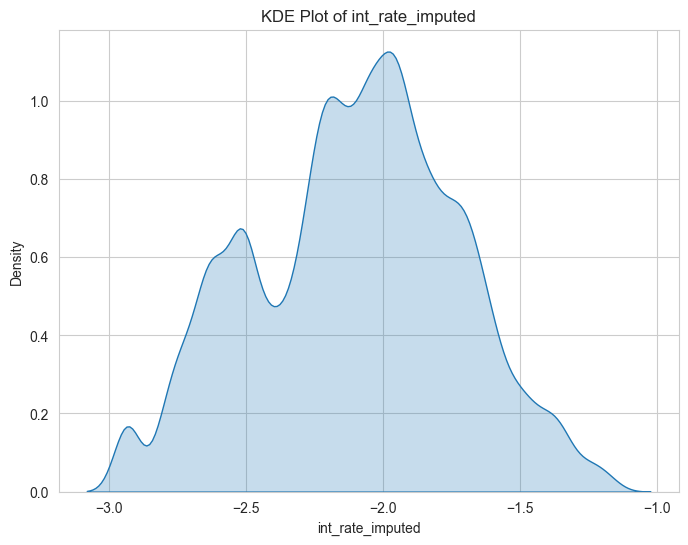

In [233]:
plot_kde(fintech_df_2, 'int_rate_imputed')

### grade

In [234]:
fintech_df_2['grade'].unique()

array([ 4, 20,  7, 23, 10, 19,  8, 14,  5, 11, 18,  6,  1, 12, 15, 25, 13,
        2,  9,  3, 28, 17, 27, 24, 30, 16, 26, 21, 29, 35, 22, 33, 34, 31,
       32], dtype=int64)

In [235]:
fintech_df_2['grade'].isna().sum()

0

### issue_date

In [236]:
fintech_df_2['issue_date'].unique()

array(['14 August 2014', '17 July 2017', '12 December 2012',
       '12 November 2012', '19 September 2019', '17 January 2017',
       '13 November 2013', '16 December 2016', '15 March 2015',
       '17 March 2017', '19 April 2019', '15 December 2015',
       '15 January 2015', '18 June 2018', '15 November 2015',
       '14 November 2014', '16 February 2016', '15 February 2015',
       '14 February 2014', '18 October 2018', '17 September 2017',
       '18 August 2018', '16 March 2016', '16 May 2016', '17 June 2017',
       '15 October 2015', '16 August 2016', '15 September 2015',
       '17 May 2017', '18 April 2018', '17 August 2017',
       '17 December 2017', '18 December 2018', '14 October 2014',
       '15 June 2015', '19 January 2019', '18 February 2018',
       '19 July 2019', '16 June 2016', '13 June 2013', '17 November 2017',
       '19 June 2019', '19 October 2019', '19 March 2019',
       '18 November 2018', '13 May 2013', '15 July 2015',
       '18 September 2018', '17 Apri

In [237]:
fintech_df_2['issue_date'].isna().sum()

0

In [238]:
def clean_issue_date(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[f'{col_name}_cleaned'] = pd.to_datetime(df[col_name])
    return df

In [239]:
fintech_df_2 = clean_issue_date(fintech_df_2, 'issue_date')

In [240]:
fintech_df_2['issue_date_cleaned'].unique()

<DatetimeArray>
['2014-08-14 00:00:00', '2017-07-17 00:00:00', '2012-12-12 00:00:00',
 '2012-11-12 00:00:00', '2019-09-19 00:00:00', '2017-01-17 00:00:00',
 '2013-11-13 00:00:00', '2016-12-16 00:00:00', '2015-03-15 00:00:00',
 '2017-03-17 00:00:00', '2019-04-19 00:00:00', '2015-12-15 00:00:00',
 '2015-01-15 00:00:00', '2018-06-18 00:00:00', '2015-11-15 00:00:00',
 '2014-11-14 00:00:00', '2016-02-16 00:00:00', '2015-02-15 00:00:00',
 '2014-02-14 00:00:00', '2018-10-18 00:00:00', '2017-09-17 00:00:00',
 '2018-08-18 00:00:00', '2016-03-16 00:00:00', '2016-05-16 00:00:00',
 '2017-06-17 00:00:00', '2015-10-15 00:00:00', '2016-08-16 00:00:00',
 '2015-09-15 00:00:00', '2017-05-17 00:00:00', '2018-04-18 00:00:00',
 '2017-08-17 00:00:00', '2017-12-17 00:00:00', '2018-12-18 00:00:00',
 '2014-10-14 00:00:00', '2015-06-15 00:00:00', '2019-01-19 00:00:00',
 '2018-02-18 00:00:00', '2019-07-19 00:00:00', '2016-06-16 00:00:00',
 '2013-06-13 00:00:00', '2017-11-17 00:00:00', '2019-06-19 00:00:00',
 '20

### pymnt_plan

In [241]:
fintech_df_2['pymnt_plan'].unique()

array([False,  True])

In [242]:
fintech_df_2['pymnt_plan'].isna().sum()

0

In [243]:
def clean_pymnt_plan(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[f'{col_name}_cleaned'] = df[col_name].astype(int)
    return df

In [244]:
fintech_df_2 = clean_pymnt_plan(fintech_df_2, 'pymnt_plan')

In [245]:
fintech_df_2['pymnt_plan_cleaned'].unique()

array([0, 1])

### type

In [246]:
fintech_df_2['type'].unique()

array(['INDIVIDUAL', 'Individual', 'Joint App', 'JOINT', 'DIRECT_PAY'],
      dtype=object)

In [247]:
fintech_df_2['type'].isna().sum()

0

In [248]:
def standardize_loan_type(df: pd.DataFrame, type_col: str) -> pd.DataFrame:
    type_mapping = {
        'INDIVIDUAL': 'Individual',
        'JOINT': 'Joint',
        'Joint App': 'Joint',
        'DIRECT_PAY': 'Direct Pay'
    }

    df[f'{type_col}_standardized'] = df[type_col].replace(type_mapping)
    
    return df

In [249]:
fintech_df_2 = standardize_loan_type(fintech_df_2, 'type')

In [250]:
fintech_df_2['type_standardized'].unique()

array(['Individual', 'Joint', 'Direct Pay'], dtype=object)

#### Encode

I chose one-hot encoding for the `type` column, which has values like "Individual," "Joint," and "Direct Pay," because these categories represent distinct types of loan arrangements without any obvious inherent order. Using label encoding could imply a ranking between these types, which does not seem to exist clearly. One-hot encoding ensures that each category is treated independently, allowing the model to understand that these are separate, non-ordinal options for loan type.

In [251]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'type_standardized')

In [252]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY
...,...,...,...
113,state,WV,48
114,state,WY,49
115,type,Individual,type_Individual
116,type,Joint,type_Joint


### purpose

In [253]:
fintech_df_2['purpose'].unique()

array(['debt_consolidation', 'other', 'credit_card', 'home_improvement',
       'major_purchase', 'small_business', 'medical', 'vacation', 'car',
       'moving', 'house', 'wedding', 'renewable_energy'], dtype=object)

In [254]:
fintech_df_2['purpose'].nunique()

13

In [255]:
fintech_df_2['purpose'].isna().sum()

0

#### Encode

I used one-hot encoding for the `purpose` column because it contains various categories, such as "car," "moving," "house," "wedding," and "renewable energy," which represent distinct purposes for the loan without any natural or meaningful order. Label encoding could imply a hierarchy or ranking among these purposes, which does not exist and could mislead the model. By applying one-hot encoding, each purpose is treated as a separate, independent feature, ensuring that the model interprets these categories as unique without inferring any unintended ordinal relationship.

In [256]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'purpose')

In [257]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY
...,...,...,...
126,purpose,car,purpose_car
127,purpose,moving,purpose_moving
128,purpose,house,purpose_house
129,purpose,wedding,purpose_wedding


### description

In [258]:
fintech_df_2['description'].unique()

array(['Debt consolidation', 'Family Help', 'Credit Card Payoff',
       'Home improvement', 'A BIRD IN THE HAND',
       'Credit card refinancing', 'Major purchase', 'Other', 'Business',
       'Debt consolidation 2013', 'Medical expenses', 'Vacation',
       'Car financing', nan, 'Help Me Get Out of  Credit Card Hell ',
       'Stress Free', 'Credit Card Freedom',
       'debt and past due credit payback', 'Consolidation',
       'Debt Consolidation', 'Freedom',
       'Credit card payment consolidation',
       'Debt Consolidation for Medical Bills', 'debt consolidation',
       'My Loan', 'Debt Free!', 'debt consolidator', 'Bus Start Up',
       'Moving and relocation', 'credit card payoff', 'Determined',
       'Loan', 'consolidation', 'refinance', 'Needed roof repair',
       'Home buying', 'fixture loan', 'My Consolidation', 'Patio',
       'Credit Card Payoff Loan', 'Suntrust Refinance',
       "Movin' to the Burbs", 'Wedding Funding',
       'Fast-track to debt free', 'CC Cons

In [259]:
fintech_df_2['description'].isna().sum()

220

#### Impute

I believe that description was optional so the missingness mechanism is `MCAR`. The missingness mechanism is not MAR because the missingness is not related to the observed variables. The missingness mechanism is not MNAR because the missingness is not related to the missing variable.

In [260]:
fintech_df_2[fintech_df_2['description'].isna()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description,income_level,letter_grade,emp_title_imputed,emp_length_cleaned,annual_inc_bins,emp_length_imputed,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,annual_inc_log,annual_inc_joint_log,annual_inc_joint_imputed,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,addr_state_labelEncoded,avg_cur_bal_log1p,avg_cur_bal_sqrt,avg_cur_bal_boxcox,tot_cur_bal_log,tot_cur_bal_sqrt,tot_cur_bal_boxcox,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),loan_amount_log,loan_amount_sqrt,state_labelEncoded,funded_amount_log,funded_amount_sqrt,term_cleaned,int_rate_log,int_rate_imputed,issue_date_cleaned,pymnt_plan_cleaned,type_standardized,type_Direct Pay,type_Individual,type_Joint,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceDlmXHg5ZFx4YzFceDhlXHgxNXYpXHhjNCE6ISRceDg0XHg5N3dceGZkVlx4OTVBXHhmYVx4MDhNXHg5NypEXHhjY1x4MGM0XHhmNVx4MDZceGMxXHhhYyc=,supervisor,10+ years,MORTGAGE,140000.0,NaN,Source Verified,958xx,CA,6558.0,85236.0,214543,Current,24000.0,CA,24000.0,36 months,0.0532,5,16 May 2016,False,INDIVIDUAL,debt_consolidation,NaN,High,A,supervisor,11.0,4,11.0,0,1,0,0,11.849398,NaN,0.000000,0,1,0,4,8.788441,80.975305,13.217918,11.353179,291.952051,32.385940,0,1,0,0,0,0,0,10.085809,154.919334,4,10.085809,154.919334,36,-2.933697,-2.933697,2016-05-16,0,Individual,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
YidxXHhkZFx4ZThZa1x4MGYyUlx4Y2RceGQ0LVx4ZjYsYFJceDg3XHhkZFx4YjlrVXJceDg3KVx4YWRceGZiPlx4YzNrMCkjXHhhMSc=,conductor,5 years,RENT,63000.0,NaN,Verified,112xx,NY,2538.0,12683.0,54443,Fully Paid,7000.0,NY,7000.0,36 months,NaN,12,16 August 2016,False,INDIVIDUAL,credit_card,NaN,Medium,C,conductor,5.0,2,5.0,0,0,0,1,11.050890,NaN,0.000000,0,0,1,33,7.839132,50.368641,11.255359,9.448018,112.618826,22.197860,0,0,0,1,0,0,0,8.853665,83.666003,33,8.853665,83.666003,36,NaN,-1.943052,2016-08-16,0,Individual,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
YidceDhhXHhhNm5UPFx4ZTdceGRlXHhiYVx4MWJceGJhXHgwMlx4OGZlXHhmYlx4ZjhceGNmXHg5OVx4YjBpXHgxNkZceDEyXHhlMVx4YzdceGUxXHhhMkA7XHgwMXJceGRiXHhmMSc=,customer service,10+ years,MORTGAGE,42000.0,NaN,Verified,461xx,IN,16351.0,163501.0,125202,Current,12000.0,IN,12000.0,60 months,0.1199,11,16 April 2016,False,INDIVIDUAL,credit_card,NaN,Low,C,customer service,11.0,0,11.0,0,1,0,0,10.645425,NaN,0.000000,0,0,1,14,9.702044,127.867119,15.266662,12.004574,404.352569,36.649689,0,1,0,0,0,0,0,9.392662,109.544512,14,9.392662,109.544512,60,-2.121097,-2.121097,2016-04-16,0,Individual,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
YidceDEwXHhkNlx4YzRceDgyXHhmMVx4MTV8RHdcclx4ZGNaXHhiYlx4ZDkiXHhmNlx4ZmZceDE4XHhmYT14XHg4NFx4YWVceGI1M1wnXHgxZFx4YzBceGNmJFx4ODFceDkxJw==,account payable specialist,10+ years,RENT,56000.0,NaN,Source Verified,119xx,NY,3266.0,39182.0,88022,Current,10000.0,NY,10000.0,36 months,0.0916,6,16 June 2016,False,INDIVIDUAL,debt_consolidation,NaN,Medium,B,account payable specialist,11.0,1,11.0,0,0,0,1,10.933107,NaN,0.000000,0,1,0,33,8.091321,57.140179,11.760960,10.575973,197.944437,27.849922,0,1,0,0,0,0,0,9.210340,100.000000,33,9.210340,100.000000,36,-2.390324,-2.390324,2016-06-16,0,Individual,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
YidceDhiXHhjZlx4MThjXHhlYlx4ZWJceGFjeVx4YzRceGM4XHhhNS1ceDExXHhhMlx4ZGZ+bTtceGFmXHhlYVx4ODFceDk4fFx4N2Zwdlx4YjJceGFmXHg5MFx4ZWI0cCc=,mason helper,10+ years,RENT,80000.0,NaN,Source Verified,104xx,NY,2996.0,56905.0,

we will just fill in the missing values with a default value which is `No Description`

In [261]:
def impute_description(df: pd.DataFrame, desc_col: str) -> pd.DataFrame:
    df[f'{desc_col}_imputed'] = df[desc_col].fillna('No Description')
    global global_lookup_table
    lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    lookup_table['Column'] = [desc_col]
    lookup_table['Original'] = [np.nan]
    lookup_table['Encoded'] = ['No Description']
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
    return df

In [262]:
fintech_df_2 = impute_description(fintech_df_2, 'description')

In [263]:
fintech_df_2['description'].unique()

array(['Debt consolidation', 'Family Help', 'Credit Card Payoff',
       'Home improvement', 'A BIRD IN THE HAND',
       'Credit card refinancing', 'Major purchase', 'Other', 'Business',
       'Debt consolidation 2013', 'Medical expenses', 'Vacation',
       'Car financing', nan, 'Help Me Get Out of  Credit Card Hell ',
       'Stress Free', 'Credit Card Freedom',
       'debt and past due credit payback', 'Consolidation',
       'Debt Consolidation', 'Freedom',
       'Credit card payment consolidation',
       'Debt Consolidation for Medical Bills', 'debt consolidation',
       'My Loan', 'Debt Free!', 'debt consolidator', 'Bus Start Up',
       'Moving and relocation', 'credit card payoff', 'Determined',
       'Loan', 'consolidation', 'refinance', 'Needed roof repair',
       'Home buying', 'fixture loan', 'My Consolidation', 'Patio',
       'Credit Card Payoff Loan', 'Suntrust Refinance',
       "Movin' to the Burbs", 'Wedding Funding',
       'Fast-track to debt free', 'CC Cons

In [264]:
fintech_df_2['description_imputed'].isna().sum()

0

# Data Transformation and Feature Engineering

## Add 4 Columns

### Add Month Number

In [265]:
def add_month_col(df: pd.DataFrame, date_col_name: str,  month_col_name: str) -> pd.DataFrame:
    df[month_col_name] = df[date_col_name].dt.month
    return df

In [266]:
fintech_df_2 = add_month_col(fintech_df_2, 'issue_date_cleaned', 'issue_month')

### Can Salary Cover

In [267]:
fintech_df_2[['annual_inc', 'annual_inc_joint_imputed', 'loan_amount']]

,annual_inc,annual_inc_joint_imputed,loan_amount
customer_id,,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,80000.0,0.000000,6000.0
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,75384.0,0.000000,15000.0
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,33800.0,0.000000,11500.0
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,50000.0,0.000000,18000.0
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,75000.0,11.982929,25000.0
...,...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,85000.0,0.000000,35000.0
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,50000.0,0.000000,10000.0
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,60000.0,0.000000,13000.0


In [268]:
global_lookup_table[global_lookup_table['Column']=='type']['Encoded'].values

array(['type_Individual', 'type_Joint', 'type_Direct Pay'], dtype=object)

In [269]:
def can_salary_cover(df: pd.DataFrame, 
                     annual_income_col: str, 
                     loan_amount_col: str, 
                     annual_joint_col: str, 
                     loan_type_col: str) -> pd.DataFrame:
    
    def salary_cover(row):
        # use global_lookup_table to get the encoded value of the loan type
        for i, encoded_col in enumerate(encoded_loan_type_cols):
            if row[encoded_col] == 1:
                loan_type = orignal_loan_type_cols[i]
                break

        loan_amount = row[loan_amount_col]
        
        if loan_type == "Joint":
            return row[annual_joint_col] >= loan_amount
        elif loan_type == "Individual" or loan_type == "Direct Pay":
            return row[annual_income_col] >= loan_amount
        else:
            return False

    encoded_loan_type_cols = global_lookup_table[global_lookup_table['Column'] == loan_type_col]['Encoded'].values
    orignal_loan_type_cols = global_lookup_table[global_lookup_table['Column'] == loan_type_col]['Original'].values
    df['salary_can_cover'] = df.apply(salary_cover, axis=1)
    
    return df

In [270]:
fintech_df_2 = can_salary_cover(
    df=fintech_df_2, 
    annual_income_col='annual_inc', 
    loan_amount_col='loan_amount', 
    annual_joint_col='annual_inc_joint_imputed', 
    loan_type_col='type')

In [271]:
fintech_df_2[['annual_inc', 'annual_inc_joint_imputed', 'loan_amount', 'salary_can_cover']][fintech_df_2['salary_can_cover']==False]

,annual_inc,annual_inc_joint_imputed,loan_amount,salary_can_cover
customer_id,,,,
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,75000.0,11.982929,25000.0,False
YidceDA0XHhjOENhXHgxM1pzXHg5NFx4YjJceDk5XHg4ZClceDAwOT9ceGM5XHgxZFx4ZDNceDE4XHgxY1x4ZDJceGU0XHhmZlx4OTVceGJkXHhiOFx4YTFceGQwXHhhN1x4YmNceGUzXHhmMic=,90000.0,11.978544,36000.0,False
YidceDE1N1x4ZjBceGU4XHg5NFx4MWJceDk4XHhjMFlceDgxXHhjY1x4ZjdceGYwXHg4YlhceGVhVVx4Y2N8U0hceGJmLC5ceGQwXHhhYixceDA1bFx4OThceGZmXHhmNyc=,60000.0,11.695247,12000.0,False
YidceGNkZyRceDg0XHgxZVx4Y2Q8XHgxMVx4MDdceDk2XHhmZFx4YjhQXHhlOVx4ZGMmXHhmNlx4Y2VhXHgxZFx4MWZceGVkXHhjZFx4ZDBaXHhmNj5ceGY2XHg5OFpceGMwXHhhMic=,77000.0,11.766327,16000.0,False
YidceGZmXHJceGFiXHhhNlx4YmJceDdmXHhjOW9ceDk3XHhmODhceDhmW1x4YWV9XHg5ZSJceGY0XHgxNFx4YjhceDAyXHhiODVCXHhmY09ceDEwQFx4YWElYFx4MWMn,82000.0,11.863582,21000.0,False
...,...,...,...,...
YidceDE3XHhmZlx4MWFwXHhmZlx4OGRBXHg5Ylx4ZDFIXHhlMFx4ZjdceDFkaUZceGYyWVx4ZDZib1x4YTlceGQyXHhiMFBceGE2JC9ceGY0XHgwMFxyXHhiZVx4ZDYn,80000.0,11.492723,35000.0,False
YidYbFx4YWRceGQwXHg5NzlbXHg4Ylx4ODh7XHhjMVlceGM0XHhiNyNceGNjXHhjZVx4ZTBjXHgxY1x4YzEuXHg4NFx4YzVVXHgxNyRceGQ2XHhjZVx4ZWRceGI0XHhmYSc=,30720.0,11.298742,12000.0,False
YidjI1x4YjZceGMwXHhkZlx4MGVceGNhXHgwNkBceDBjXHg4ZmBceGUyXHhmYXNceDAyYjh2XHgxNUFceGUyXHg5Y1x4OWNceDE3X1x4ZjdaXHhiNFx4MTRceDk4XHg3Zic=,50000.0,11.648330,35000.0,False


### Letter Grade

In [272]:
def change_number_to_grade(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    grade_mapping = {
        'A': range(1,6),
        'B': range(6,11),
        'C': range(11,16),
        'D': range(16,21),
        'E': range(21,26),
        'F': range(26,31),
        'G': range(31,36)
    }
    def get_grade(x: int):
        for k, v in grade_mapping.items():
            if x in v:
                return k

    df['letter_grade'] = df[col_name].apply(lambda x: get_grade(x))
    # add the dict mapping to global lookup table
    global global_lookup_table
    lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    rows = [{'Column': 'grade', 'Original': num, 'Encoded': k} for k, v in grade_mapping.items() for num in v]
    lookup_table = pd.concat([lookup_table, pd.DataFrame(rows)], ignore_index=True)
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)

    return df

In [273]:
fintech_df_2 = change_number_to_grade(fintech_df_2, 'grade')

In [274]:
fintech_df_2[['grade', 'letter_grade']]

,grade,letter_grade
customer_id,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,4,A
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,20,D
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,7,B
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,23,E
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,10,B
...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,17,D
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,6,B
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,1,A


In [275]:
fintech_df_2 = encode_col(fintech_df_2, 'label', 'letter_grade', need_to_sort=True)

In [276]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY
...,...,...,...
169,letter_grade,C,2
170,letter_grade,D,3
171,letter_grade,E,4
172,letter_grade,F,5


In [277]:
global_lookup_table[global_lookup_table['Column']=='grade']  

,Column,Original,Encoded
132,grade,1,A
133,grade,2,A
134,grade,3,A
135,grade,4,A
136,grade,5,A
137,grade,6,B
138,grade,7,B
139,grade,8,B
140,grade,9,B
141,grade,10,B


### Installment per month

In [278]:
fintech_df_2['term_cleaned'].unique()

array([36, 60])

In [279]:
def calculate_installment_per_month(df: pd.DataFrame, loan_amount_col: str, term_col: str, int_rate_col_imputed: str) -> pd.DataFrame:
    r = np.exp(df[int_rate_col_imputed])/12
    n = df[term_col]
    P = df[loan_amount_col]
    numerator = r * (1+r)**n
    denominator = (1+r)**n - 1
    df['installment_per_month'] = P * (numerator/denominator)
    return df

In [280]:
fintech_df_2 = calculate_installment_per_month(fintech_df_2, 'loan_amount', 'term_cleaned', 'int_rate_imputed')

In [281]:
for col in fintech_df_2.columns:
    if(fintech_df_2[col].isna().sum() > 0):
        print(col, fintech_df_2[col].isna().sum())

emp_title 2328
emp_length 1832
annual_inc_joint 25170
int_rate 1185
description 220
emp_length_cleaned 1832
annual_inc_joint_log 25170
int_rate_log 1185


## Normalization

In [282]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize_columns(df: pd.DataFrame, numeric_cols: List[str], norm_type: str='minmax') -> pd.DataFrame:
    """
    Normalizes specified numeric columns in the dataframe using Min-Max or Z-score scaling.
    
    Parameters:
    - df: DataFrame to be normalized
    - numeric_cols: List of column names to be normalized
    - norm_type: Type of normalization ('minmax' or 'z-score')
    
    Returns:
    - DataFrame with normalized columns
    """
    assert norm_type in ['minmax', 'z-score'], 'Invalid normalization type. Choose either "minmax" or "z-score".'
    
    if norm_type == 'minmax':
        scaler = MinMaxScaler()
    else: 
        scaler = StandardScaler()

    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df


In [283]:
fintech_df_2.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'income_level',
       'letter_grade', 'emp_title_imputed', 'emp_length_cleaned',
       'annual_inc_bins', 'emp_length_imputed', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT',
       'annual_inc_log', 'annual_inc_joint_log', 'annual_inc_joint_imputed',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'addr_state_labelEncoded', 'avg_cur_bal_log1p', 'avg_cur_bal_sqrt',
       'avg_cur_bal_boxcox', 'tot_cur_bal_log', 'tot_cur_bal_sqrt',
       'tot_cur_bal_boxcox', 'loan_status_Charged Off', 'loan_status_Current'

In [284]:
numeric_cols = ['annual_inc', 'annual_inc_joint_imputed', 'avg_cur_bal_log1p', 'avg_cur_bal_boxcox', 'tot_cur_bal_log', 'tot_cur_bal_boxcox', 'loan_amount_log','loan_amount_sqrt', 'funded_amount_log','funded_amount_sqrt', 'int_rate_imputed', 'installment_per_month']
fintech_df_2 = normalize_columns(fintech_df_2, numeric_cols, norm_type='z-score')


These features were selected because they are continuous, numerical variables with varying scales and distributions

I chose StandardScaler (Z-score normalization) because it centers each feature around a mean of zero and scales them based on the standard deviation, bringing all features to a common scale. StandardScaler is particularly beneficial when using machine learning algorithms that are sensitive to feature scales, such as linear models and neural networks

# Bonus Task

In [285]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_state_names(url: str) -> dict:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    rows = soup.find_all('tr')[1:] 
    state_dict = {}
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 3:
            state_name = cols[0].text.strip()
            state_abbreviation = cols[2].text.strip()
            state_dict[state_abbreviation] = state_name
    return state_dict

def add_state_names(df: pd.DataFrame, state_col: str, url: str) -> pd.DataFrame:
    state_dict = get_state_names(url)
    df['state_name'] = df[state_col].map(state_dict)
    return df

url = "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"

fintech_df_2 = add_state_names(fintech_df_2, 'state', url)



In [286]:
fintech_df_2[['state', 'state_name']]

,state,state_name
customer_id,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,FL,Florida
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,VA,Virginia
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,NY,New York
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,NJ,New Jersey
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,TX,Texas
...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,NJ,New Jersey
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,CT,Connecticut
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,WI,Wisconsin


# Save the cleaned dataset

In [287]:
fintech_df_2.to_csv('fintech_data_MET_P2_52_1008_clean.csv')

In [288]:
global_lookup_table.to_csv('lookup_table_MET_P2_52_1008.csv')